# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [5]:
%pip install iso3166

Note: you may need to restart the kernel to use updated packages.


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [6]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


### Import Statements

In [50]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [51]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [38]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [10]:
df_data.shape

(4324, 9)

In [11]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [12]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [13]:
df_data.isna()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4319,False,False,False,False,False,False,False,True,False
4320,False,False,False,False,False,False,False,True,False
4321,False,False,False,False,False,False,False,True,False
4322,False,False,False,False,False,False,False,True,False


In [14]:
print(f"Any duplicates? {df_data.duplicated().values.any()}")

Any duplicates? False


In [15]:
df_data = df_data.rename(columns={'Organisation': 'Organization'})
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organization,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [16]:
print(f"Any duplicates? {df_data.duplicated().values.any()}")

Any duplicates? False


In [17]:
# Delete the first two columns
df_data = df_data.drop('Unnamed: 0.1', axis=1)
df_data.head()

,Unnamed: 0,Organization,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [18]:
df_data = df_data.drop('Unnamed: 0', axis=1)

In [19]:
df_data.head()

,Organization,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


## Descriptive Statistics

In [20]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Organization    4324 non-null   object
 1   Location        4324 non-null   object
 2   Date            4324 non-null   object
 3   Detail          4324 non-null   object
 4   Rocket_Status   4324 non-null   object
 5   Price           964 non-null    object
 6   Mission_Status  4324 non-null   object
dtypes: object(7)
memory usage: 236.6+ KB


In [21]:
df_data.describe()

,Organization,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,4324,4324,4324,4324,4324,964,4324
unique,56,137,4319,4278,2,56,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Wed Nov 05, 2008 00:15 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success
freq,1777,235,2,6,3534,136,3879


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organization.

In [22]:
df_data['Organization'].value_counts()

RVSN USSR           1777
Arianespace          279
CASC                 251
General Dynamics     251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
US Navy               17
ISA                   13
Rocket Lab            13
Eurockot              13
ESA                   13
Blue Origin           12
IAI                   11
ExPace                10
ASI                    9
CNES                   8
AMBA                   8
MITT                   7
JAXA                   7
Land Launch            7
UT                     5
KCST                   5
CASIC                  5
Exos                   4
CECLES                 4
Arm??e de l'Air        4


In [23]:
org_launches = df_data['Organization'].value_counts()
org_launches

RVSN USSR           1777
Arianespace          279
CASC                 251
General Dynamics     251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
US Navy               17
ISA                   13
Rocket Lab            13
Eurockot              13
ESA                   13
Blue Origin           12
IAI                   11
ExPace                10
ASI                    9
CNES                   8
AMBA                   8
MITT                   7
JAXA                   7
Land Launch            7
UT                     5
KCST                   5
CASIC                  5
Exos                   4
CECLES                 4
Arm??e de l'Air        4


<Axes: >

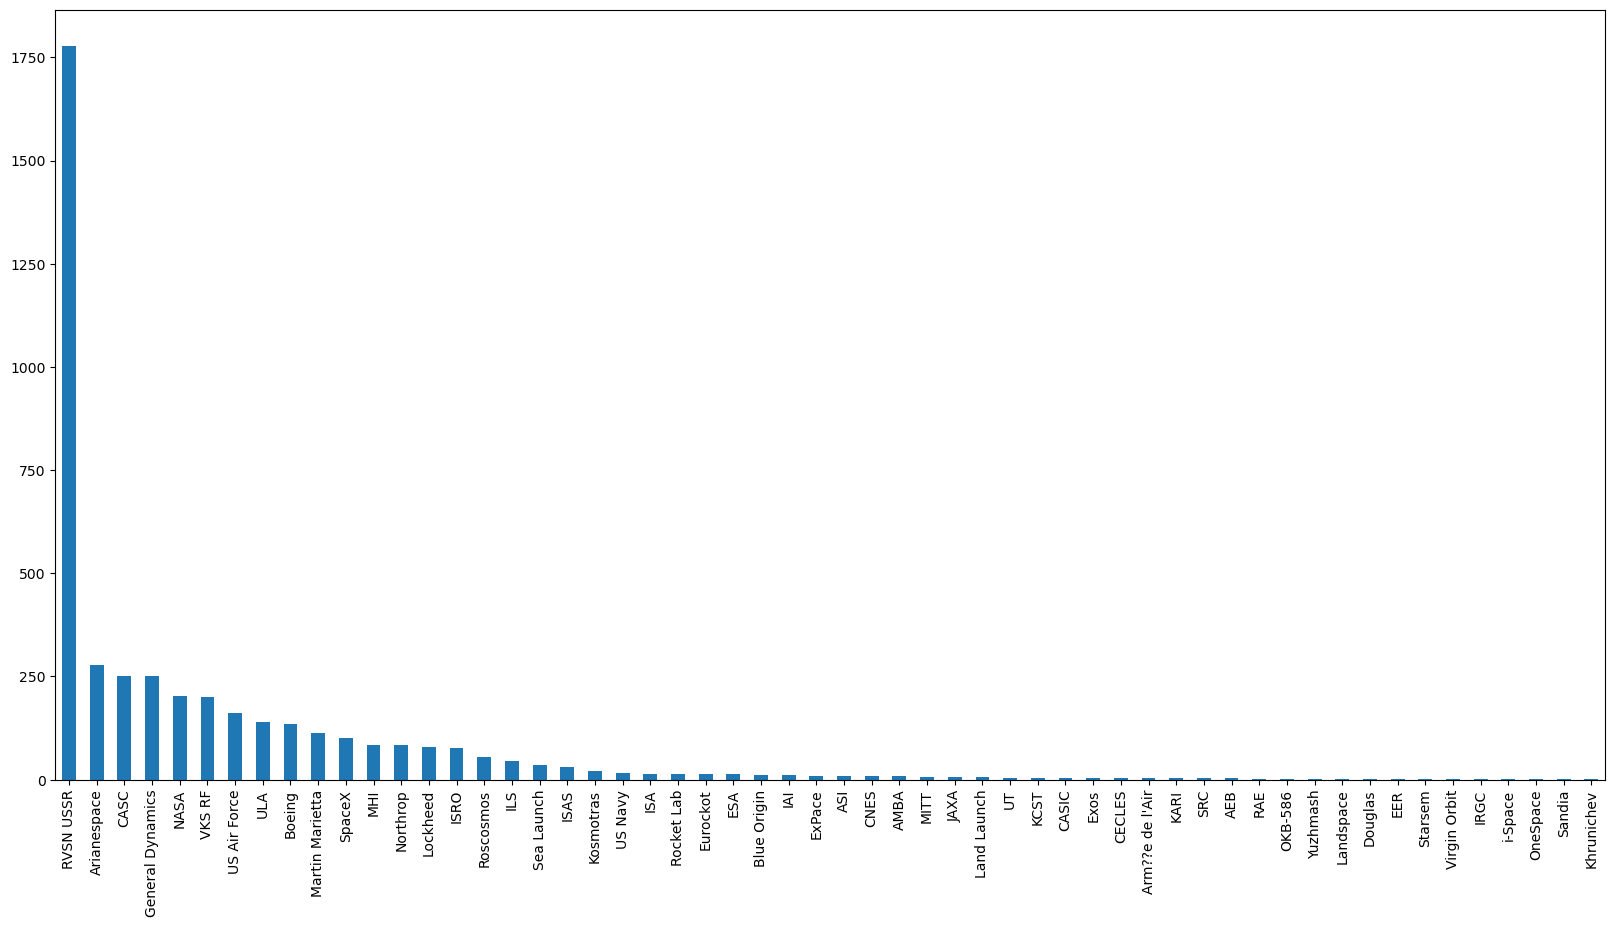

In [24]:
org_launches.plot(kind='bar', figsize=(20,10))

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [25]:
df_data.head()

,Organization,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [26]:
df_data = pd.read_csv('mission_launches.csv')
df_data

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [27]:
df_data = df_data.drop('Unnamed: 0.1', axis=1)
df_data.head()

,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [28]:
df_data = df_data.drop('Unnamed: 0', axis=1)
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


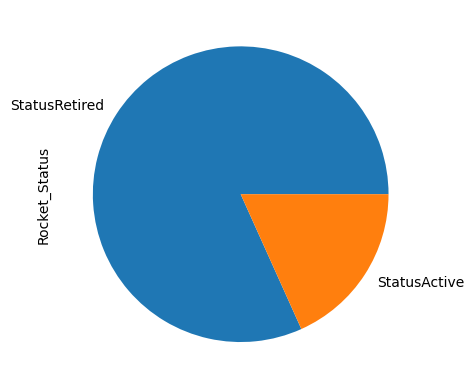

In [29]:
status = df_data['Rocket_Status'].value_counts(dropna=False).plot(kind="pie")

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [30]:
mission_status = df_data['Rocket_Status'].value_counts(dropna=False)
mission_status

StatusRetired    3534
StatusActive      790
Name: Rocket_Status, dtype: int64

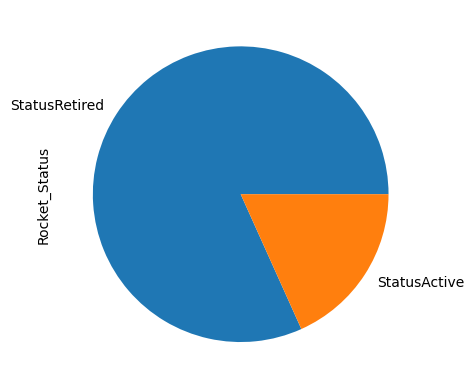

In [31]:
mission_status = df_data['Rocket_Status'].value_counts(dropna=False).plot(kind="pie")

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [32]:
launches_cost = df_data['Price'].value_counts(dropna=True)
launches_cost

450.0      136
200.0       75
40.0        55
62.0        41
30.8        38
109.0       37
50.0        34
64.68       34
29.75       33
90.0        32
41.8        31
48.5        26
29.15       25
31.0        22
29.0        22
59.0        22
69.7        17
21.0        16
65.0        16
35.0        16
56.5        15
37.0        15
164.0       15
7.5         14
1,160.0     13
47.0        13
25.0        12
350.0       11
153.0       11
45.0        10
112.5        9
5.3          9
123.0        8
145.0        7
85.0         7
120.0        7
80.0         7
115.0        6
59.5         5
7.0          5
46.0         5
136.6        4
63.23        4
140.0        3
133.0        3
190.0        3
130.0        3
135.0        2
5,000.0      2
39.0         2
55.0         1
15.0         1
20.14        1
20.0         1
12.0         1
28.3         1
Name: Price, dtype: int64

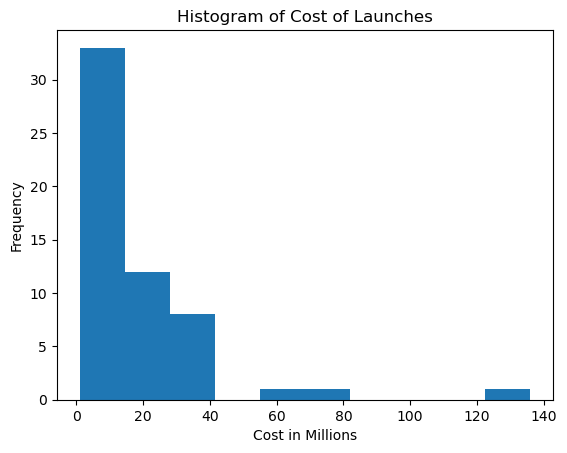

In [33]:
launches_cost.plot.hist(column="Cost", bins=10)
plt.xlabel('Cost in Millions')
plt.ylabel('Frequency')
plt.title('Histogram of Cost of Launches')
plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [34]:
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [35]:
df_data = df_data.rename(columns={'country_codes': 'Country_codes'})
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [36]:
df_data = df_data.rename(columns={'Organisation': 'Organization'})
df_data.head()

,Organization,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [37]:
# Delete the first two columns
df_data = df_data.drop('Unnamed: 0.1', axis=1)
df_data.head()

KeyError: "['Unnamed: 0.1'] not found in axis"

In [ ]:
# Delete the first two columns
df_data = df_data.drop('Unnamed: 0', axis=1)
df_data.head()

,Organization,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [ ]:
#Add a Country colunn as a duplicate of the Location
df_data['Country'] = df_data.loc[:, "Location"]
df_data.head()

,Organization,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,"LC-39A, Kennedy Space Center, Florida, USA"
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce..."
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,"Pad A, Boca Chica, Texas, USA"
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,"Site 200/39, Baikonur Cosmodrome, Kazakhstan"
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,"SLC-41, Cape Canaveral AFS, Florida, USA"


In [58]:
# Next, delete everything before the last comma
df_data['Country'] = df_data['Country'].str.split(',').str[-1].str.strip()
df_data.head()

KeyError: 'Country'

In [ ]:
df_data['Country'].unique()

array(['USA', 'China', 'Kazakhstan', 'Japan', 'Israel', 'New Zealand',
       'Russia', 'Shahrud Missile Test Site', 'France', 'Iran', 'India',
       'New Mexico', 'Yellow Sea', 'North Korea',
       'Pacific Missile Range Facility', 'Pacific Ocean', 'South Korea',
       'Barents Sea', 'Brazil', 'Gran Canaria', 'Kenya', 'Australia'],
      dtype=object)

In [ ]:
# Replace the outliers

df_data['Country'] = df_data['Country'].replace(['Yellow Sea'], 'China')
df_data['Country'] = df_data['Country'].replace(['New Mexico' ], 'USA')
df_data['Country'] = df_data['Country'].replace(['Pacific Ocean'], 'USA')
df_data['Country'] = df_data['Country'].replace(['Gran Canaria' ], 'USA')
df_data['Country'] = df_data['Country'].replace(['Pacific Missile Range Facility'], 'USA')
df_data['Country'] = df_data['Country'].replace(['Shahrud Missle Test Site'], 'Iran')
df_data['Country'] = df_data['Country'].replace(['Russia'], 'Russian Federation')
df_data['Country'] = df_data['Country'].replace(['Barents Sea'], 'Russian Federation')
df_data['Country'].unique()

array(['USA', 'China', 'Kazakhstan', 'Japan', 'Israel', 'New Zealand',
       'Russian Federation', 'Shahrud Missile Test Site', 'France',
       'Iran', 'India', 'North Korea', 'South Korea', 'Brazil', 'Kenya',
       'Australia'], dtype=object)

In [ ]:
df_data['Country'] = df_data['Country'].replace(['Shahrud Missile Test Site'], 'Iran')
df_data['Country'].unique()


array(['USA', 'China', 'Kazakhstan', 'Japan', 'Israel', 'New Zealand',
       'Russian Federation', 'Iran', 'France', 'India', 'North Korea',
       'South Korea', 'Brazil', 'Kenya', 'Australia'], dtype=object)

In [57]:
# Now I have to convert the country names to the country codes using ISO 3166 
import pycountry
import pandas as pd

# Example DataFrame with a 'location' column
countries = df_data['Country']

# Create a dictionary mapping country names to ISO 3166-1 alpha-3 codes
for country in pycountry.countries:
    countries[country.name] = country.alpha_3
#codes = [countries.get(country, 'Unknown code') for country in countries]

# Apply the mapping to the 'location' column
df_data['country_codes'] = df_data['Country'].map(countries)
df_data.head()

KeyError: 'Country'

In [ ]:
df_data = df_data.rename(columns={'country_codes': 'Country_codes'})
df_data.head()

,Organization,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Country_codes
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,NaN
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,NaN
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,NaN


In [ ]:
df_data['Country_codes'] = df_data['Country_codes'].fillna("USA")
df_data.head()

,Organization,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Country_codes
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,USA


# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

In [55]:
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [56]:
df_data['Country'] = df_data['Country'].replace(['Shahrud Missile Test Site'], 'Iran')
df_data['Country'].unique()

KeyError: 'Country'

In [53]:
launches_country = df_data['Country'].value_counts(dropna=True)
launches_country

KeyError: 'Country'

In [52]:
launches_country = df_data['Country_codes'].value_counts(dropna=True)
launches_country

KeyError: 'Country_codes'

In [41]:
total_launches_country = launches_country.to_frame().reset_index()
total_launches_country

NameError: name 'launches_country' is not defined

In [40]:
#Chloropeth Chart
world_map = px.choropleth(total_launches_country,
                          locations="Country_codes",
                          color="count", 
                          hover_name="count", 
                          color_continuous_scale=px.colors.sequential.matter,
                          title="Number of Launches by Country",)
 
world_map.update_layout(coloraxis_showscale=True,)
 
world_map.show()

NameError: name 'total_launches_country' is not defined

# Use a Choropleth Map to Show the Number of Failures by Country


In [59]:
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [60]:
df_data.tail()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success
4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Fri Oct 04, 1957 19:28 UTC",Sputnik 8K71PS | Sputnik-1,StatusRetired,NaN,Success


In [ ]:
df_data['Mission_Status'].unique()

array(['Success', 'Failure', 'Prelaunch Failure', 'Partial Failure'],
      dtype=object)

In [ ]:
# Change the data ONLY in the ['Mission_Status'] column to change all the failures to failures
df_data['Mission_Status'] = df_data['Mission_Status'].replace(['Partial Failure'], 'Failure')
df_data['Mission_Status'] = df_data['Mission_Status'].replace(['Prelaunch Failure'], 'Failure')
df_data['Mission_Status'].unique()

array(['Success', 'Failure'], dtype=object)

In [61]:
df_data['Mission_Status'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4324 entries, 0 to 4323
Series name: Mission_Status
Non-Null Count  Dtype 
--------------  ----- 
4324 non-null   object
dtypes: object(1)
memory usage: 33.9+ KB


In [ ]:
df_data['Mission_Status'].value_counts()

Mission_Status
Success    3879
Failure     445
Name: count, dtype: int64

In [62]:
df_mission_failure = df_data[~df_data['Mission_Status'].isin(['Success'])]
df_mission_failure

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
11,ExPace,"Site 95, Jiuquan Satellite Launch Center, China","Fri Jul 10, 2020 04:17 UTC","Kuaizhou 11 | Jilin-1 02E, CentiSpace-1 S2",StatusActive,28.3,Failure
15,Rocket Lab,"Rocket Lab LC-1A, M?hia Peninsula, New Zealand","Sat Jul 04, 2020 21:19 UTC",Electron/Curie | Pics Or It Didn??¦t Happen,StatusActive,7.5,Failure
27,Virgin Orbit,"Cosmic Girl, Mojave Air and Space Port, Califo...","Mon May 25, 2020 19:50 UTC",LauncherOne | Demo Flight,StatusActive,12.0,Failure
36,CASC,"LC-2, Xichang Satellite Launch Center, China","Thu Apr 09, 2020 11:46 UTC",Long March 3B/E | Nusantara Dua,StatusActive,29.15,Failure
43,CASC,"LC-201, Wenchang Satellite Launch Center, China","Mon Mar 16, 2020 13:34 UTC",Long March 7A | XJY-6,StatusActive,NaN,Failure
...,...,...,...,...,...,...,...
4314,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Mon Apr 28, 1958 02:53 UTC",Vanguard | Vanguard TV5,StatusRetired,NaN,Failure
4315,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Apr 27, 1958 09:01 UTC",Sputnik 8A91 | Sputnik-3 #1,StatusRetired,NaN,Failure
4318,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Wed Mar 05, 1958 18:27 UTC",Juno I | Explorer 2,StatusRetired,NaN,Failure
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure


In [ ]:
#Now I want a dataframe of ONLY the 445 failures and their country codes
failures_country = df_mission_failure[['Country_codes', 'Mission_Status']]
failures_country.head()


,Country_codes,Mission_Status
11,CHN,Failure
15,NZL,Failure
27,USA,Failure
36,CHN,Failure
43,CHN,Failure


In [ ]:
failures_country.groupby(failures_country['Country_codes']).size()

Country_codes
AUS      3
BRA      3
CHN     25
FRA     18
IND     13
ISR      2
JPN     13
KAZ     93
NZL      2
RUS     93
USA    180
dtype: int64

In [ ]:
#A dataframe of the total failures per count
total_failures_country = failures_country["Country_codes"].value_counts()
total_failures_country


Country_codes
USA    180
KAZ     93
RUS     93
CHN     25
FRA     18
IND     13
JPN     13
BRA      3
AUS      3
NZL      2
ISR      2
Name: count, dtype: int64

In [ ]:
total_failures_country = total_failures_country.to_frame().reset_index()
total_failures_country

,Country_codes,count
0,USA,180
1,KAZ,93
2,RUS,93
3,CHN,25
4,FRA,18
5,IND,13
6,JPN,13
7,BRA,3
8,AUS,3
9,NZL,2


In [ ]:
#Chloropeth Chart
world_map = px.choropleth(total_failures_country,
                          locations="Country_codes",
                          color="count", 
                          hover_name="count", 
                          color_continuous_scale=px.colors.sequential.matter,
                          title="Number of Launch Failures by Country",)
 
world_map.update_layout(coloraxis_showscale=True,)
 
world_map.show()

# Create a Plotly Sunburst Chart of the countries, organizations, and mission status. 

In [ ]:
import pandas as pd
import plotly.express as px

In [ ]:
df_data.head()

,Organization,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Country_codes
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,USA


In [ ]:
# Create a dataframe of ONLY the countries, organizations, and mission status
sunburst_chart = df_data[['Organization', 'Country_codes', 'Mission_Status']]
sunburst_chart.head()

,Organization,Country_codes,Mission_Status
0,SpaceX,USA,Success
1,CASC,CHN,Success
2,SpaceX,USA,Success
3,Roscosmos,KAZ,Success
4,ULA,USA,Success


In [ ]:
import pandas as pd
import plotly.express as px


fig = px.sunburst(sunburst_chart, path=['Country_codes', 'Mission_Status', 'Organization'],)
fig.show()

# Analyze the Total Amount of Money Spent by Organization on Space Missions

In [ ]:
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA


In [ ]:
df_data = df_data.rename(columns={'Organisation': 'Organization'})
df_data.head()

,Organization,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA


In [ ]:
df_data = pd.read_csv('mission_launches.csv')
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [ ]:
# Create a dataframe of ONLY the Organization and Price
costs_organization = df_data[['Organization', 'Price']]
costs_organization.head()

,Organization,Price
0,SpaceX,50.0
1,CASC,29.75
2,SpaceX,NaN
3,Roscosmos,65.0
4,ULA,145.0


In [ ]:
# Drop the NaN values
costs_organization.dropna()

,Organization,Price
0,SpaceX,50.0
1,CASC,29.75
3,Roscosmos,65.0
4,ULA,145.0
5,CASC,64.68
...,...,...
3855,US Air Force,59.0
3971,US Air Force,63.23
3993,US Air Force,63.23
4000,US Air Force,63.23


In [ ]:
# Organization and Price Value Counts
costs_organization.value_counts()


Organization  Price
NASA          450.0    136
Arianespace   200.0     75
Northrop      40.0      55
CASC          30.8      38
SpaceX        62.0      37
                      ... 
ILS           130.0      1
              153.0      1
JAXA          90.0       1
Northrop      55.0       1
Virgin Orbit  12.0       1
Name: count, Length: 76, dtype: int64

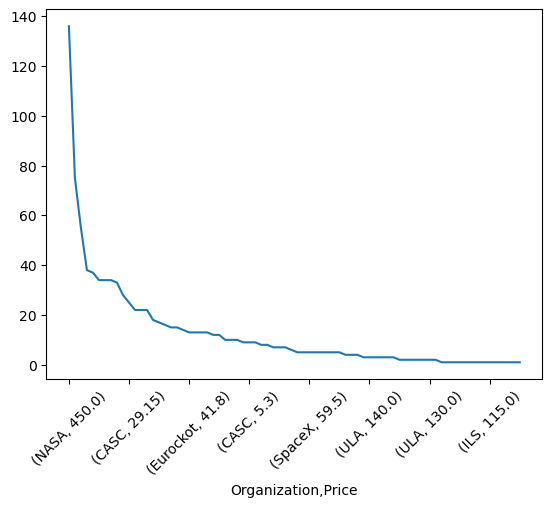

In [ ]:
# importing packages
import seaborn

costs = costs_organization.value_counts()
# plot the result
costs.plot()
plt.xticks(rotation=45)
plt.show()

CHECK THIS CHART. IT DOESN'T LOOK RIGHT.

In [ ]:
line = px.line(costs_organization, 
               x="Organization", 
               y="Price",
               color="Organization",
               title="Total Spent by Organization in Millions")
 
line.show()

# Analyze the Amount of Money Spent by Organization per Launch

In [ ]:
# Create a dataframe of ONLY the Organization and Price
costs_organization = df_data[['Organization', 'Price']]
costs_organization.head()

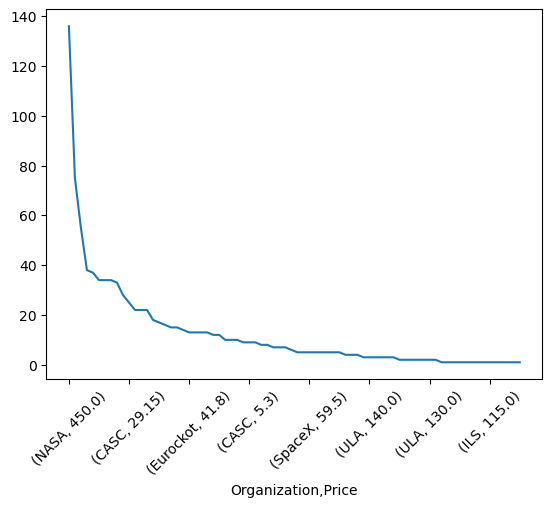

In [ ]:
# Organization and Price Value Counts
import seaborn

costs = costs_organization.value_counts()
# plot the result
costs.plot()
plt.xticks(rotation=45)
plt.show()

# Chart the Number of Launches per Year

In [ ]:
df_data.head()

,Organization,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Country_codes
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,USA


In [ ]:
# Change the date to a year and add a column
df_data['Year'] = df_data['Date']
df_data.head()

,Organization,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Country_codes,Year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA,"Fri Aug 07, 2020 05:12 UTC"
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN,"Thu Aug 06, 2020 04:01 UTC"
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA,"Tue Aug 04, 2020 23:57 UTC"
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,KAZ,"Thu Jul 30, 2020 21:25 UTC"
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,USA,"Thu Jul 30, 2020 11:50 UTC"


In [ ]:
df_data['Year'] = pd.to_datetime(df_data['Year'], utc=True)
df_data.head()

,Organization,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Country_codes,Year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA,2020-08-07 05:12:00+00:00
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN,2020-08-06 04:01:00+00:00
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA,2020-08-04 23:57:00+00:00
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,KAZ,2020-07-30 21:25:00+00:00
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,USA,2020-07-30 11:50:00+00:00


In [ ]:
df_data['Year_Only'] = df_data['Year'].dt.year
df_data.head()

,Organization,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Country_codes,Year,Year_Only
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA,2020-08-07 05:12:00+00:00,2020
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN,2020-08-06 04:01:00+00:00,2020
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA,2020-08-04 23:57:00+00:00,2020
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,KAZ,2020-07-30 21:25:00+00:00,2020
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,USA,2020-07-30 11:50:00+00:00,2020


In [63]:
# Delete column Year
df_data = df_data.drop(columns=['Year'])

KeyError: "['Year'] not found in axis"

In [ ]:
df_data.head()

,Organization,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Country_codes,Year_Only
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA,2020
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN,2020
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA,2020
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,KAZ,2020
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,USA,2020


Chart the nummber of launches per year

In [ ]:

launches_per_year = df_data['Year_Only'].value_counts()
launches_per_year.head()

Year_Only
1971    119
2018    117
1977    114
1975    113
1976    113
Name: count, dtype: int64

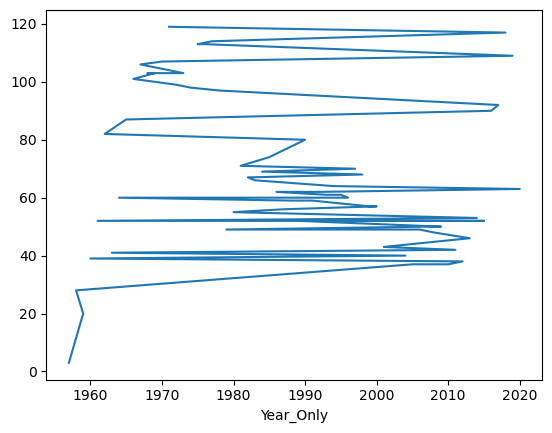

In [ ]:
# Launches per Year Value Counts
import seaborn

launches_per_year = df_data['Year_Only'].value_counts()
# plot the result
launches_per_year.plot()
plt.show()

<Axes: xlabel='Year_Only'>

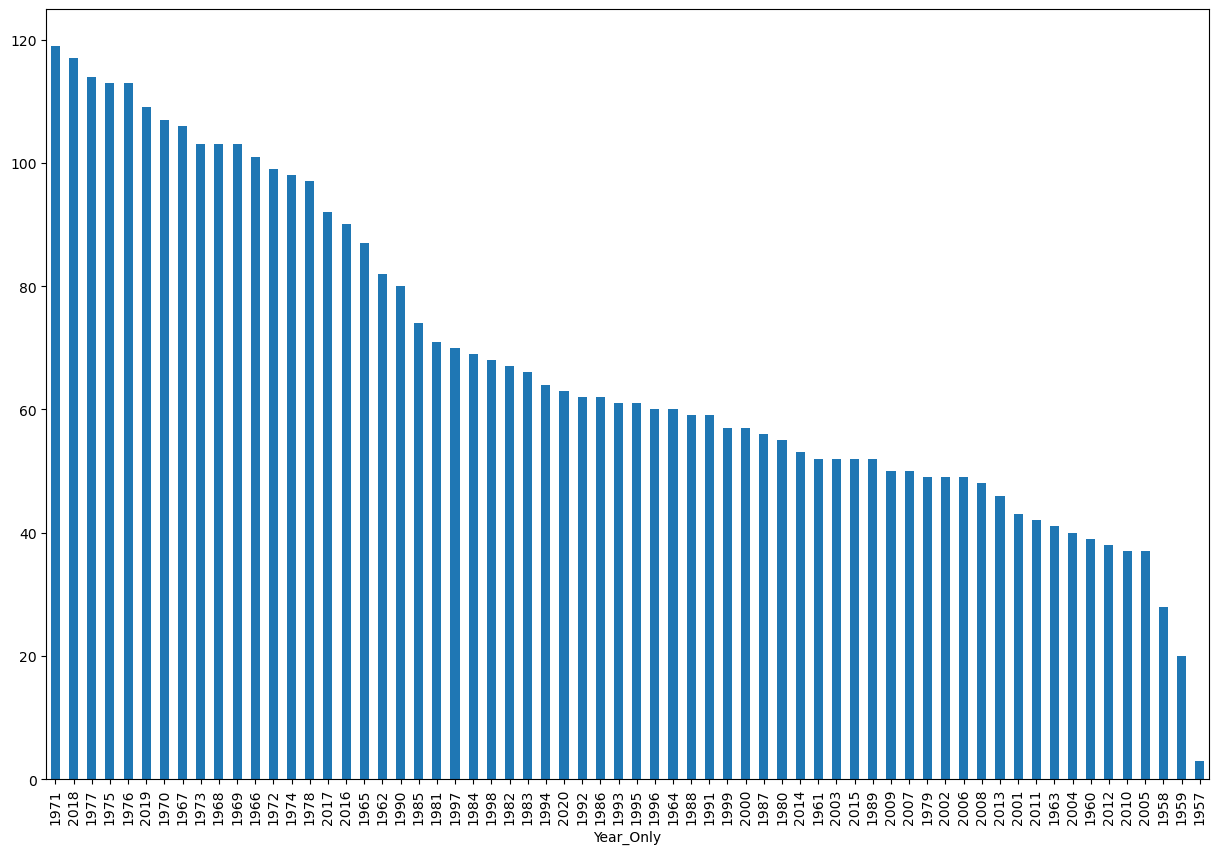

In [ ]:
df_data['Year_Only'].value_counts().plot(kind='bar', figsize=(15, 10))

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [ ]:
df_data.head()

,Organization,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Country_codes,Year_Only
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA,2020
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN,2020
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA,2020
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,KAZ,2020
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,USA,2020


In [ ]:
df_data['Month'] = df_data['Date']
df_data.head()

,Organization,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Country_codes,Year_Only,Month
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA,2020,"Fri Aug 07, 2020 05:12 UTC"
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN,2020,"Thu Aug 06, 2020 04:01 UTC"
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA,2020,"Tue Aug 04, 2020 23:57 UTC"
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,KAZ,2020,"Thu Jul 30, 2020 21:25 UTC"
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,USA,2020,"Thu Jul 30, 2020 11:50 UTC"


In [ ]:
# Convert month to a string
# Use strip method to get only the months 

In [372]:
df_data['Month_Only']= df_data['Month'].astype(str)
df_data.head()

,Organization,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,Year_Only,Month,Country,Month_Only
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00,2020,"Fri Aug 07, 2020 05:12 UTC",USA,"Fri Aug 07, 2020 05:12 UTC"
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00,2020,"Thu Aug 06, 2020 04:01 UTC",China,"Thu Aug 06, 2020 04:01 UTC"
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04 23:57:00+00:00,2020,"Tue Aug 04, 2020 23:57 UTC",USA,"Tue Aug 04, 2020 23:57 UTC"
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30 21:25:00+00:00,2020,"Thu Jul 30, 2020 21:25 UTC",Kazakhstan,"Thu Jul 30, 2020 21:25 UTC"
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30 11:50:00+00:00,2020,"Thu Jul 30, 2020 11:50 UTC",USA,"Thu Jul 30, 2020 11:50 UTC"


In [378]:
# Use strip method
df_data['Month_Only'] = df_data['Month_Only'].str.replace(r':', ' ', regex=True)
df_data.head()

,Organization,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,Year_Only,Month,Country,Month_Only
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00,2020,"Fri Aug 07, 2020 05:12 UTC",USA,"Fri Aug 07, 2020 05 12 UTC"
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00,2020,"Thu Aug 06, 2020 04:01 UTC",China,"Thu Aug 06, 2020 04 01 UTC"
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04 23:57:00+00:00,2020,"Tue Aug 04, 2020 23:57 UTC",USA,"Tue Aug 04, 2020 23 57 UTC"
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30 21:25:00+00:00,2020,"Thu Jul 30, 2020 21:25 UTC",Kazakhstan,"Thu Jul 30, 2020 21 25 UTC"
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30 11:50:00+00:00,2020,"Thu Jul 30, 2020 11:50 UTC",USA,"Thu Jul 30, 2020 11 50 UTC"


In [379]:
# Use strip method
df_data['Month_Only'] = df_data['Month_Only'].str.replace(r',', ' ', regex=True)
df_data.head()

,Organization,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,Year_Only,Month,Country,Month_Only
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00,2020,"Fri Aug 07, 2020 05:12 UTC",USA,Fri Aug 07 2020 05 12 UTC
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00,2020,"Thu Aug 06, 2020 04:01 UTC",China,Thu Aug 06 2020 04 01 UTC
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04 23:57:00+00:00,2020,"Tue Aug 04, 2020 23:57 UTC",USA,Tue Aug 04 2020 23 57 UTC
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30 21:25:00+00:00,2020,"Thu Jul 30, 2020 21:25 UTC",Kazakhstan,Thu Jul 30 2020 21 25 UTC
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30 11:50:00+00:00,2020,"Thu Jul 30, 2020 11:50 UTC",USA,Thu Jul 30 2020 11 50 UTC


In [380]:
# Use strip method
df_data['Month_Only'] = df_data['Month_Only'].str.replace(r'UTC', ' ', regex=True)
df_data.head()

,Organization,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,Year_Only,Month,Country,Month_Only
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00,2020,"Fri Aug 07, 2020 05:12 UTC",USA,Fri Aug 07 2020 05 12
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00,2020,"Thu Aug 06, 2020 04:01 UTC",China,Thu Aug 06 2020 04 01
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04 23:57:00+00:00,2020,"Tue Aug 04, 2020 23:57 UTC",USA,Tue Aug 04 2020 23 57
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30 21:25:00+00:00,2020,"Thu Jul 30, 2020 21:25 UTC",Kazakhstan,Thu Jul 30 2020 21 25
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30 11:50:00+00:00,2020,"Thu Jul 30, 2020 11:50 UTC",USA,Thu Jul 30 2020 11 50


In [382]:
# Use strip method
df_data['Month_Only'] = df_data['Month_Only'].str.replace(r'\d+', '', regex=True)
df_data.head()

,Organization,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,Year_Only,Month,Country,Month_Only
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00,2020,"Fri Aug 07, 2020 05:12 UTC",USA,Fri Aug
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00,2020,"Thu Aug 06, 2020 04:01 UTC",China,Thu Aug
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04 23:57:00+00:00,2020,"Tue Aug 04, 2020 23:57 UTC",USA,Tue Aug
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30 21:25:00+00:00,2020,"Thu Jul 30, 2020 21:25 UTC",Kazakhstan,Thu Jul
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30 11:50:00+00:00,2020,"Thu Jul 30, 2020 11:50 UTC",USA,Thu Jul


In [383]:
# Use strip method
df_data['Month_Only'] = df_data['Month_Only'].str.replace(r'Fri', '', regex=True)
df_data.head()

,Organization,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,Year_Only,Month,Country,Month_Only
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00,2020,"Fri Aug 07, 2020 05:12 UTC",USA,Aug
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00,2020,"Thu Aug 06, 2020 04:01 UTC",China,Thu Aug
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04 23:57:00+00:00,2020,"Tue Aug 04, 2020 23:57 UTC",USA,Tue Aug
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30 21:25:00+00:00,2020,"Thu Jul 30, 2020 21:25 UTC",Kazakhstan,Thu Jul
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30 11:50:00+00:00,2020,"Thu Jul 30, 2020 11:50 UTC",USA,Thu Jul


In [384]:
# Use strip method
df_data['Month_Only'] = df_data['Month_Only'].str.replace(r'Sat', '', regex=True)
df_data.head()

,Organization,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,Year_Only,Month,Country,Month_Only
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00,2020,"Fri Aug 07, 2020 05:12 UTC",USA,Aug
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00,2020,"Thu Aug 06, 2020 04:01 UTC",China,Thu Aug
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04 23:57:00+00:00,2020,"Tue Aug 04, 2020 23:57 UTC",USA,Tue Aug
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30 21:25:00+00:00,2020,"Thu Jul 30, 2020 21:25 UTC",Kazakhstan,Thu Jul
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30 11:50:00+00:00,2020,"Thu Jul 30, 2020 11:50 UTC",USA,Thu Jul


In [385]:
# Use strip method
df_data['Month_Only'] = df_data['Month_Only'].str.replace(r'Fri', '', regex=True)
df_data.head()

,Organization,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,Year_Only,Month,Country,Month_Only
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00,2020,"Fri Aug 07, 2020 05:12 UTC",USA,Aug
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00,2020,"Thu Aug 06, 2020 04:01 UTC",China,Thu Aug
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04 23:57:00+00:00,2020,"Tue Aug 04, 2020 23:57 UTC",USA,Tue Aug
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30 21:25:00+00:00,2020,"Thu Jul 30, 2020 21:25 UTC",Kazakhstan,Thu Jul
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30 11:50:00+00:00,2020,"Thu Jul 30, 2020 11:50 UTC",USA,Thu Jul


In [386]:
# Use strip method
df_data['Month_Only'] = df_data['Month_Only'].str.replace(r'Mon', '', regex=True)
df_data.head()

,Organization,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,Year_Only,Month,Country,Month_Only
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00,2020,"Fri Aug 07, 2020 05:12 UTC",USA,Aug
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00,2020,"Thu Aug 06, 2020 04:01 UTC",China,Thu Aug
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04 23:57:00+00:00,2020,"Tue Aug 04, 2020 23:57 UTC",USA,Tue Aug
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30 21:25:00+00:00,2020,"Thu Jul 30, 2020 21:25 UTC",Kazakhstan,Thu Jul
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30 11:50:00+00:00,2020,"Thu Jul 30, 2020 11:50 UTC",USA,Thu Jul


In [390]:
# Use strip method
df_data['Month_Only'] = df_data['Month_Only'].str.replace(r'Tue', '', regex=True)
df_data.head()

,Organization,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,Year_Only,Month,Country,Month_Only
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00,2020,"Fri Aug 07, 2020 05:12 UTC",USA,Aug
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00,2020,"Thu Aug 06, 2020 04:01 UTC",China,Aug
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04 23:57:00+00:00,2020,"Tue Aug 04, 2020 23:57 UTC",USA,Aug
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30 21:25:00+00:00,2020,"Thu Jul 30, 2020 21:25 UTC",Kazakhstan,Jul
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30 11:50:00+00:00,2020,"Thu Jul 30, 2020 11:50 UTC",USA,Jul


In [391]:
# Use strip method
df_data['Month_Only'] = df_data['Month_Only'].str.replace(r'Wed', '', regex=True)
df_data.head()

,Organization,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,Year_Only,Month,Country,Month_Only
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00,2020,"Fri Aug 07, 2020 05:12 UTC",USA,Aug
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00,2020,"Thu Aug 06, 2020 04:01 UTC",China,Aug
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04 23:57:00+00:00,2020,"Tue Aug 04, 2020 23:57 UTC",USA,Aug
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30 21:25:00+00:00,2020,"Thu Jul 30, 2020 21:25 UTC",Kazakhstan,Jul
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30 11:50:00+00:00,2020,"Thu Jul 30, 2020 11:50 UTC",USA,Jul


In [392]:
# Use strip method
df_data['Month_Only'] = df_data['Month_Only'].str.replace(r'Thu', '', regex=True)
df_data.head()

,Organization,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,Year_Only,Month,Country,Month_Only
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00,2020,"Fri Aug 07, 2020 05:12 UTC",USA,Aug
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00,2020,"Thu Aug 06, 2020 04:01 UTC",China,Aug
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04 23:57:00+00:00,2020,"Tue Aug 04, 2020 23:57 UTC",USA,Aug
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30 21:25:00+00:00,2020,"Thu Jul 30, 2020 21:25 UTC",Kazakhstan,Jul
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30 11:50:00+00:00,2020,"Thu Jul 30, 2020 11:50 UTC",USA,Jul


In [394]:
# Use strip method
df_data['Month_Only'] = df_data['Month_Only'].str.replace(r'Sun', '', regex=True)
df_data.head()

,Organization,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,Year_Only,Month,Country,Month_Only
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00,2020,"Fri Aug 07, 2020 05:12 UTC",USA,Aug
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00,2020,"Thu Aug 06, 2020 04:01 UTC",China,Aug
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04 23:57:00+00:00,2020,"Tue Aug 04, 2020 23:57 UTC",USA,Aug
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30 21:25:00+00:00,2020,"Thu Jul 30, 2020 21:25 UTC",Kazakhstan,Jul
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30 11:50:00+00:00,2020,"Thu Jul 30, 2020 11:50 UTC",USA,Jul


In [395]:
df_data['Month_Only'].unique()

array([' Aug       ', ' Jul       ', ' Jun       ', ' May       ',
       ' Apr       ', ' Mar       ', ' Feb       ', ' Jan       ',
       ' Dec       ', ' Nov       ', ' Oct       ', ' Sep       ',
       ' Aug   ', ' Feb   ', ' Dec   ', ' Jul   ', ' Apr   ', ' Jan   ',
       ' Nov   ', ' Sep   ', ' May   ', ' Jun   ', ' Oct   ', ' Mar   '],
      dtype=object)

Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [399]:
month_data = df_data[['Year_Only', 'Month_Only']]
month_data.head()

,Year_Only,Month_Only
0,2020,Aug
1,2020,Aug
2,2020,Aug
3,2020,Jul
4,2020,Jul


In [420]:
launches_per_month = month_data.value_counts(subset=['Year_Only', 'Month_Only'])
launches_per_month = launches_per_month.reset_index()
launches_per_month

,Year_Only,Month_Only,0
0,1975,Sep,16
1,1968,Apr,16
2,1971,Dec,16
3,2019,Dec,16
4,2018,Dec,15
...,...,...,...
846,2012,Nov,1
847,1976,Nov,1
848,2012,May,1
849,2012,Mar,1


In [422]:
launches_per_month=launches_per_month.rename(columns = {0:'Launches_Month'})
launches_per_month.head()

,Year_Only,Month_Only,Launches_Month
0,1975,Sep,16
1,1968,Apr,16
2,1971,Dec,16
3,2019,Dec,16
4,2018,Dec,15


In [409]:
# Counts Example
# launches_by_months = month_data.groupby(by=["Year_Only", "Month_Only"], as_index=False).count()
# launches_by_months = month_data.sort_values("Month_Only")[["Year_Only", "Month_Only"]]
# powers_by_year.reset_index(inplace=True) 
# powers_by_year


In [423]:
# Add an average launches per month column
month_data.head()

,Year_Only,Month_Only
0,2020,Aug
1,2020,Aug
2,2020,Aug
3,2020,Jul
4,2020,Jul


In [428]:
# Make a Launches column
month_data = month_data[['Year_Only', 'Month_Only']].value_counts()
month_data

Year_Only  Month_Only 
1975        Sep           16
1968        Apr           16
1971        Dec           16
2019        Dec           16
2018        Dec           15
                          ..
2012        Nov            1
1976        Nov            1
2012        May            1
            Mar            1
1957        Dec            1
Length: 851, dtype: int64

In [429]:
month_data = pd.DataFrame(month_data)
month_data

,,0
Year_Only,Month_Only,
1975,Sep,16
1968,Apr,16
1971,Dec,16
2019,Dec,16
2018,Dec,15
...,...,...
2012,Nov,1
1976,Nov,1
2012,May,1


In [430]:
month_data=month_data.rename(columns = {0:'Launches'})
month_data

,,Launches
Year_Only,Month_Only,
1975,Sep,16
1968,Apr,16
1971,Dec,16
2019,Dec,16
2018,Dec,15
...,...,...
2012,Nov,1
1976,Nov,1
2012,May,1


In [1]:
#Is there a way to format this by year? And we need an average per month per year column.
# Need to sort by year
month_data_sorted_year = month_data.sort_values(by="Year_Only")
month_data_sorted_year

NameError: name 'month_data' is not defined

In [ ]:
# Make a Mean (Average) column
# Sample data 
# costs_per_year.groupby(['Price' ,'Year_Only']).mean().reset_index()

In [ ]:
# Add a rolling month column
# Sample Code
# df.resample("1d").sum().fillna(0).rolling(window=3, min_periods=1).mean()
# from https://stackoverflow.com/questions/15771472/pandas-rolling-mean-by-time-interval

In [431]:
month_data["Rolling"] = month_data["Launches"].sum().rolling(window=12, min_periods=1).mean()
month_data

AttributeError: 'numpy.int64' object has no attribute 'rolling'

Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [ ]:
# Make a chart with a rolling monthly average

In [ ]:
#Sample code, CHANGE THIS
window_size = 12  # Number of days in a month (adjust as needed)
month_data['Rolling'] = month_data[''].rolling(window=window_size).mean()

In [ ]:
#Sample code, CHANGE THIS

import matplotlib.pyplot as plt
plt.plot(df['Date'], df['Price'], label='Original Price')
plt.plot(df['Date'], df['Rolling'], label='Rolling Average')
plt.title('Data With Rolling Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
# More sample code
import pandas as pd
import matplotlib.pyplot as plt

costs_per_year.plot(kind='bar', rot=0, figsize=(20, 25))
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Price Per Year')
plt.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [ ]:
# Use the above data and chart to write down the bast time of year for launches

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [ ]:
df_data.head()

,Organization,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Country_codes,Year_Only,Month
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA,2020,2020-08-07 05:12:00+00:00
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN,2020,2020-08-06 04:01:00+00:00
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA,2020,2020-08-04 23:57:00+00:00
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,KAZ,2020,2020-07-30 21:25:00+00:00
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,USA,2020,2020-07-30 11:50:00+00:00


In [ ]:
df_data['Year_Only'] = pd.to_datetime(df_data['Year_Only'], format='%Y') 
df_data.head()

,Organization,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Country_codes,Year_Only,Month
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA,2020-01-01,2020-08-07 05:12:00+00:00
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN,2020-01-01,2020-08-06 04:01:00+00:00
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA,2020-01-01,2020-08-04 23:57:00+00:00
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,KAZ,2020-01-01,2020-07-30 21:25:00+00:00
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,USA,2020-01-01,2020-07-30 11:50:00+00:00


In [ ]:
df_data['Year_Only'] = df_data['Year_Only'].dt.year
df_data.head()

,Organization,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Country_codes,Year_Only,Month
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA,2020,2020-08-07 05:12:00+00:00
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN,2020,2020-08-06 04:01:00+00:00
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA,2020,2020-08-04 23:57:00+00:00
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,KAZ,2020,2020-07-30 21:25:00+00:00
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,USA,2020,2020-07-30 11:50:00+00:00


In [ ]:
df_data['Price'].isna()

0       False
1       False
2        True
3       False
4       False
        ...  
4319     True
4320     True
4321     True
4322     True
4323     True
Name: Price, Length: 4324, dtype: bool

In [ ]:
# Create a dataframe of ONLY the Organization and Year
costs_per_year = df_data[['Price', 'Year_Only']]
costs_per_year.head()

,Price,Year_Only
0,50.0,2020
1,29.75,2020
2,NaN,2020
3,65.0,2020
4,145.0,2020


In [ ]:
costs_per_year.dropna(how='any')

,Price,Year_Only
0,50.0,2020
1,29.75,2020
3,65.0,2020
4,145.0,2020
5,64.68,2020
...,...,...
3855,59.0,1966
3971,63.23,1965
3993,63.23,1965
4000,63.23,1964


In [ ]:
costs_per_year.groupby(['Price' ,'Year_Only']).mean().reset_index()

,Price,Year_Only
0,"1,160.0",1967
1,"1,160.0",1968
2,"1,160.0",1969
3,"1,160.0",1970
4,"1,160.0",1971
...,...,...
415,90.0,2016
416,90.0,2017
417,90.0,2018
418,90.0,2019


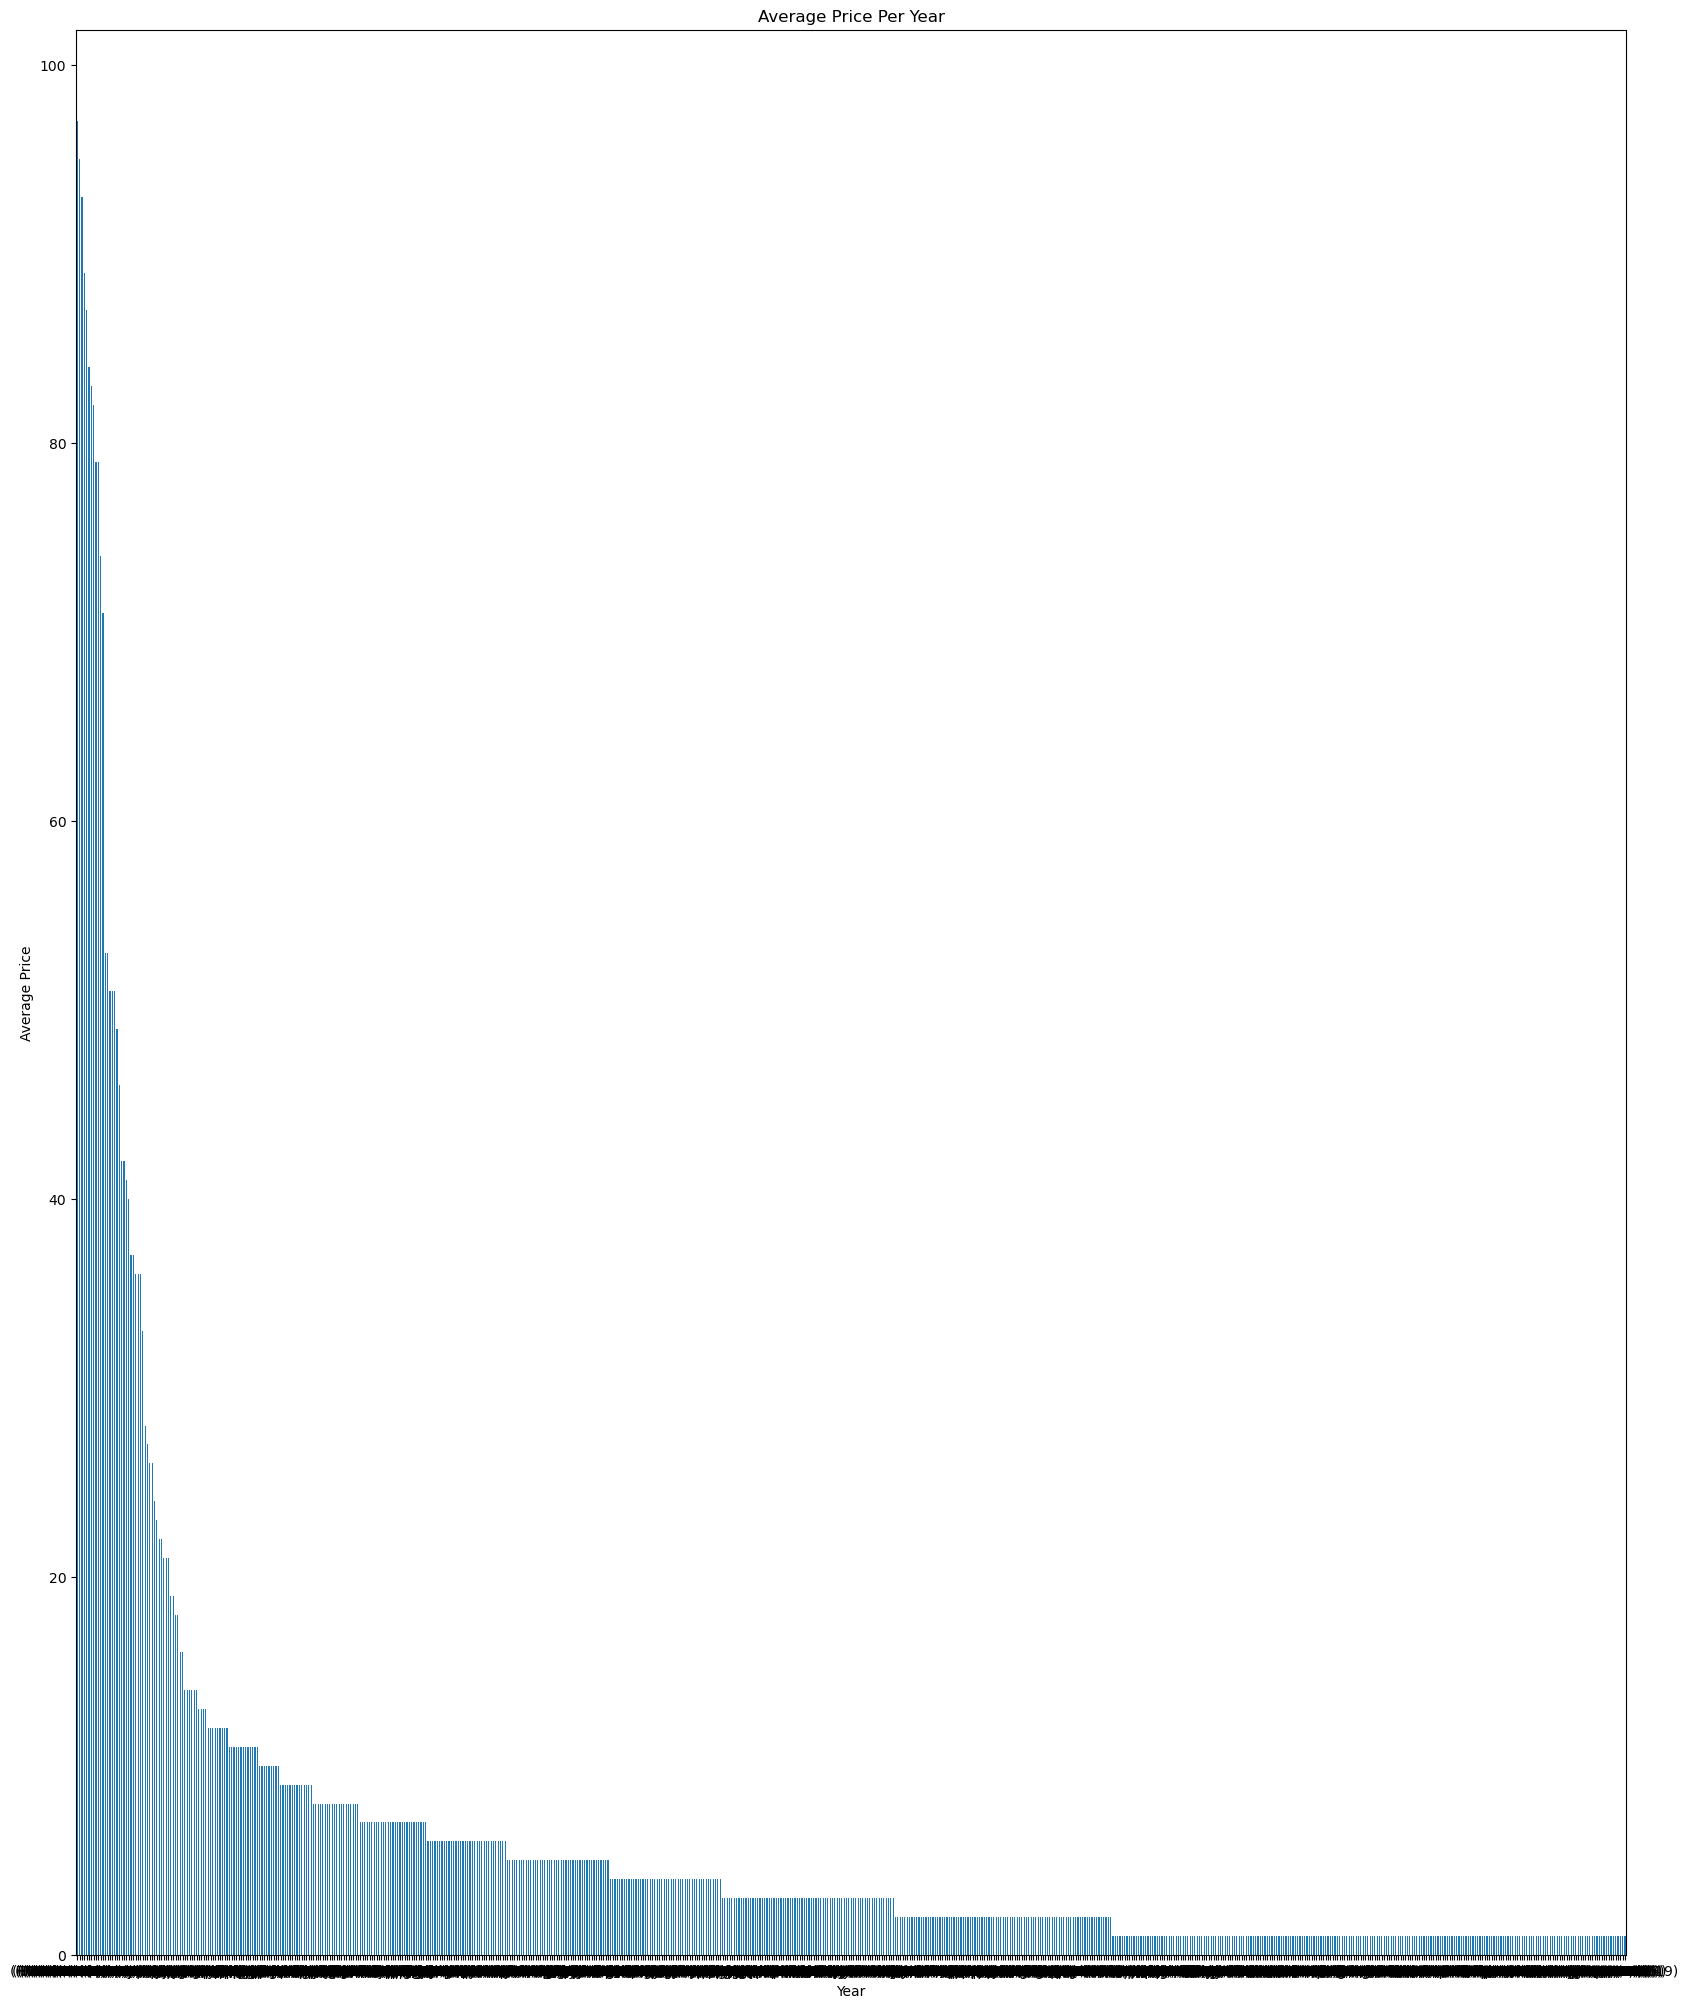

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

costs_per_year.plot(kind='bar', rot=0, figsize=(20, 25))
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Price Per Year')
plt.show()

# Chart the Number of Launches over Time by the Top 10 Organizations. 

How has the dominance of launches changed over time between the different players? 

In [ ]:
org_launches = df_data['Organization'].value_counts()
org_launches

Organization
RVSN USSR           1777
Arianespace          279
CASC                 251
General Dynamics     251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
US Navy               17
ISA                   13
Rocket Lab            13
Eurockot              13
ESA                   13
Blue Origin           12
IAI                   11
ExPace                10
ASI                    9
CNES                   8
AMBA                   8
MITT                   7
JAXA                   7
Land Launch            7
UT                     5
KCST                   5
CASIC                  5
Exos                   4
CECLES                 4
Arm??e de l'

In [315]:
# Create a dataframe of ONLY the Organization, Year, and Number of Launches Per Organization
org_launches_per_year = df_data[['Organization', 'Year_Only']].value_counts()
org_launches_per_year

Organization  Year_Only
RVSN USSR     1977         97
              1976         95
              1971         93
              1975         89
              1970         87
                           ..
JAXA          2013          1
ISRO          2006          1
              2005          1
              2004          1
i-Space       2019          1
Length: 663, dtype: int64

In [316]:
org_by_year = pd.DataFrame(org_launches_per_year)
org_by_year

0
Organization Year_Only    
RVSN USSR    1977       97
             1976       95
             1971       93
             1975       89
             1970       87
...                     ..
JAXA         2013        1
ISRO         2006        1
             2005        1
             2004        1
i-Space      2019        1

[663 rows x 1 columns]

In [320]:
# Change the title "index" to "Launches"
org_by_year = org_by_year.rename(columns = {0:'Launches'})
org_by_year

Launches
Organization Year_Only          
RVSN USSR    1977             97
             1976             95
             1971             93
             1975             89
             1970             87
...                          ...
JAXA         2013              1
ISRO         2006              1
             2005              1
             2004              1
i-Space      2019              1

[663 rows x 1 columns]

In [345]:
org_launches = pd.DataFrame(df_data['Organization'].value_counts())
org_launches

,Organization
RVSN USSR,1777
Arianespace,279
CASC,251
General Dynamics,251
NASA,203
VKS RF,201
US Air Force,161
ULA,140
Boeing,136
Martin Marietta,114


In [346]:
org_launches.reset_index(inplace=True)
org_launches

,index,Organization
0,RVSN USSR,1777
1,Arianespace,279
2,CASC,251
3,General Dynamics,251
4,NASA,203
5,VKS RF,201
6,US Air Force,161
7,ULA,140
8,Boeing,136
9,Martin Marietta,114


In [347]:
org_launches=org_launches.rename(columns = {'Organization':'Launches'})
org_launches.head()

,index,Launches
0,RVSN USSR,1777
1,Arianespace,279
2,CASC,251
3,General Dynamics,251
4,NASA,203


In [348]:
org_launches=org_launches.rename(columns = {'index':'Organization'})
org_launches.head()

,Organization,Launches
0,RVSN USSR,1777
1,Arianespace,279
2,CASC,251
3,General Dynamics,251
4,NASA,203


In [442]:
# Drop all organizations not in the top ten
top_ten_orgs = org_launches.drop(index=[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 
                                        22, 23, 24, 25, 26, 27, 28 , 29, 30, 31, 32, 33, 
                                        34, 35, 36, 37,38, 39, 40, 41, 42, 43, 44, 45, 
                                        46, 47, 48, 49, 50, 51, 52, 53, 54, 55])
top_ten_orgs

,Organization,Launches
0,RVSN USSR,1777
1,Arianespace,279
2,CASC,251
3,General Dynamics,251
4,NASA,203
5,VKS RF,201
6,US Air Force,161
7,ULA,140
8,Boeing,136
9,Martin Marietta,114


In [444]:
# Create a dataframe of ONLY the Organization, Year, and Number of Launches Per Organization
org_launches_per_year = df_data[['Organization', 'Year_Only']].value_counts()
org_launches_per_year

Organization  Year_Only
RVSN USSR     1977         97
              1976         95
              1971         93
              1975         89
              1970         87
                           ..
JAXA          2013          1
ISRO          2006          1
              2005          1
              2004          1
i-Space       2019          1
Length: 663, dtype: int64

In [447]:
org_launches_by_year = pd.DataFrame(org_launches_per_year).reset_index
org_launches_by_year

<bound method DataFrame.reset_index of                          0
Organization Year_Only    
RVSN USSR    1977       97
             1976       95
             1971       93
             1975       89
             1970       87
...                     ..
JAXA         2013        1
ISRO         2006        1
             2005        1
             2004        1
i-Space      2019        1

[663 rows x 1 columns]>

In [450]:
# Set 'column_name' as the index
org_launches_by_year.set_index('Organization', inplace=True)
org_launches_by_year

AttributeError: 'function' object has no attribute 'set_index'

In [449]:
org_launches_by_year=org_launches_per_year.rename(columns = {0:'Launches'})
org_launches.head()

TypeError: Series.rename() got an unexpected keyword argument 'columns'

In [ ]:
# powers_by_year = df_powers_6.groupby(by=["Organization", "Year_Only"], as_index=False).count()
# powers_by_year = powers_by_year.sort_values("Year_Only")[["Year_Only", "Country"]]
# powers_by_year.reset_index(inplace=True) 
# powers_by_year

In [441]:
df_orgs_by_year = pd.DataFrame(org_by_year)
df_orgs_by_year


,level_0,index


In [440]:
org_by_year.reset_index(inplace=True)
org_by_year.head()

,level_0,index


In [ ]:
# The error is that there is no index.
# Try to make another dataframe.

In [435]:
orgs_year = org_by_year[~org_by_year["Organization"].str.contains('SpaceX')]
orgs_year["Organization"].unique()

KeyError: 'Organization'

In [434]:
org_by_year['Organization'].unique()

KeyError: 'Organization'

In [ ]:
orgs_year = org_by_year[~org_by_year["Organization"].str.contains('SpaceX')]
orgs_year["Organization"].unique()

In [366]:
orgs_year['Organization'].unique()

KeyError: 'Organization'

In [ ]:
# Sample how to delete method
df_powers = df_1991_and_before_split[~df_1991_and_before_split['Country'].str.contains('China')]
df_powers['Country'].unique()

In [363]:
orgs_year = org_by_year[~org_by_year["Organization"].str.contains('SpaceX')]
orgs_year["Organization"].unique()


KeyError: 'Organization'

In [362]:
# Now filter for the top ten above
strings_to_remove = ['SpaceX', 'MHI', 'Northrop', 'Lockheed', 'ISRO', 'Roscosmos','ILS',	'Sea Launch', 'ISAS','Kosmotras','US Navy', 'ISA',	'Rocket Lab', 'Eurockot', 'ESA', 
'Blue Origin', 'IAI','ExPace', 'ASI', 'CNES', 'AMBA',	'MITT,'	'JAXA','Land Launch', 'UT', 'KCST',	'CASIC', 'Exos', 'CECLES', 'Arme de l Air','KARI','SRC', 
'AEB', 'RAE', 'OKB-586', 'Yuzhmash', 'Landspace','Douglas', 'EER', 'Starsem', 'Virgin Orbit', 'IRGC', 'i-Space','OneSpace', 'Sandia','Khrunichev']
top_ten_orgs_year  = org_by_year[~org_by_year.isin(strings_to_remove)]
top_ten_orgs_year

Launches
Organization Year_Only          
RVSN USSR    1977             97
             1976             95
             1971             93
             1975             89
             1970             87
...                          ...
JAXA         2013              1
ISRO         2006              1
             2005              1
             2004              1
i-Space      2019              1

[663 rows x 1 columns]

In [359]:
top_ten_orgs_year['Organization'].unique()

KeyError: 'Organization'

In [356]:
# Now filter for the top ten above
top_ten_orgs_year = org_by_year[org_by_year['Organization'].str.contains('RSVN USSR', 'Arianespace', 'CASC', 'General Dynamics', 'NASA', 'VKS RF', 
                                                                         'US Air Force','ULA','Boeing', 'Martin Marietta')]
top_ten_orgs_year

KeyError: 'Organization'

In [350]:
# Now filter for the top ten above
top_ten_orgs_year = org_by_year[org_by_year["Organization"].str.contains("RSVN USSR|Arianespace|CASC|General Dynamics|NASA|VKS RF|US Air Force|ULA|Boeing|Martin Marietta")]
top_ten_orgs_year["Organization"].unique()

KeyError: 'Organization'

In [349]:
org_by_year


Launches
Organization Year_Only          
RVSN USSR    1977             97
             1976             95
             1971             93
             1975             89
             1970             87
...                          ...
JAXA         2013              1
ISRO         2006              1
             2005              1
             2004              1
i-Space      2019              1

[663 rows x 1 columns]

In [ ]:
import pandas as pd
import plotly.express as px

px.bar(org_by_year, x='count', y="Organization", color="coun", barmode="group")

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['count'] but received: Year_Only

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x='Year_Only', y='Organization', data=org_by_year, hue='count')

ValueError: Could not interpret input 'Year_Only'

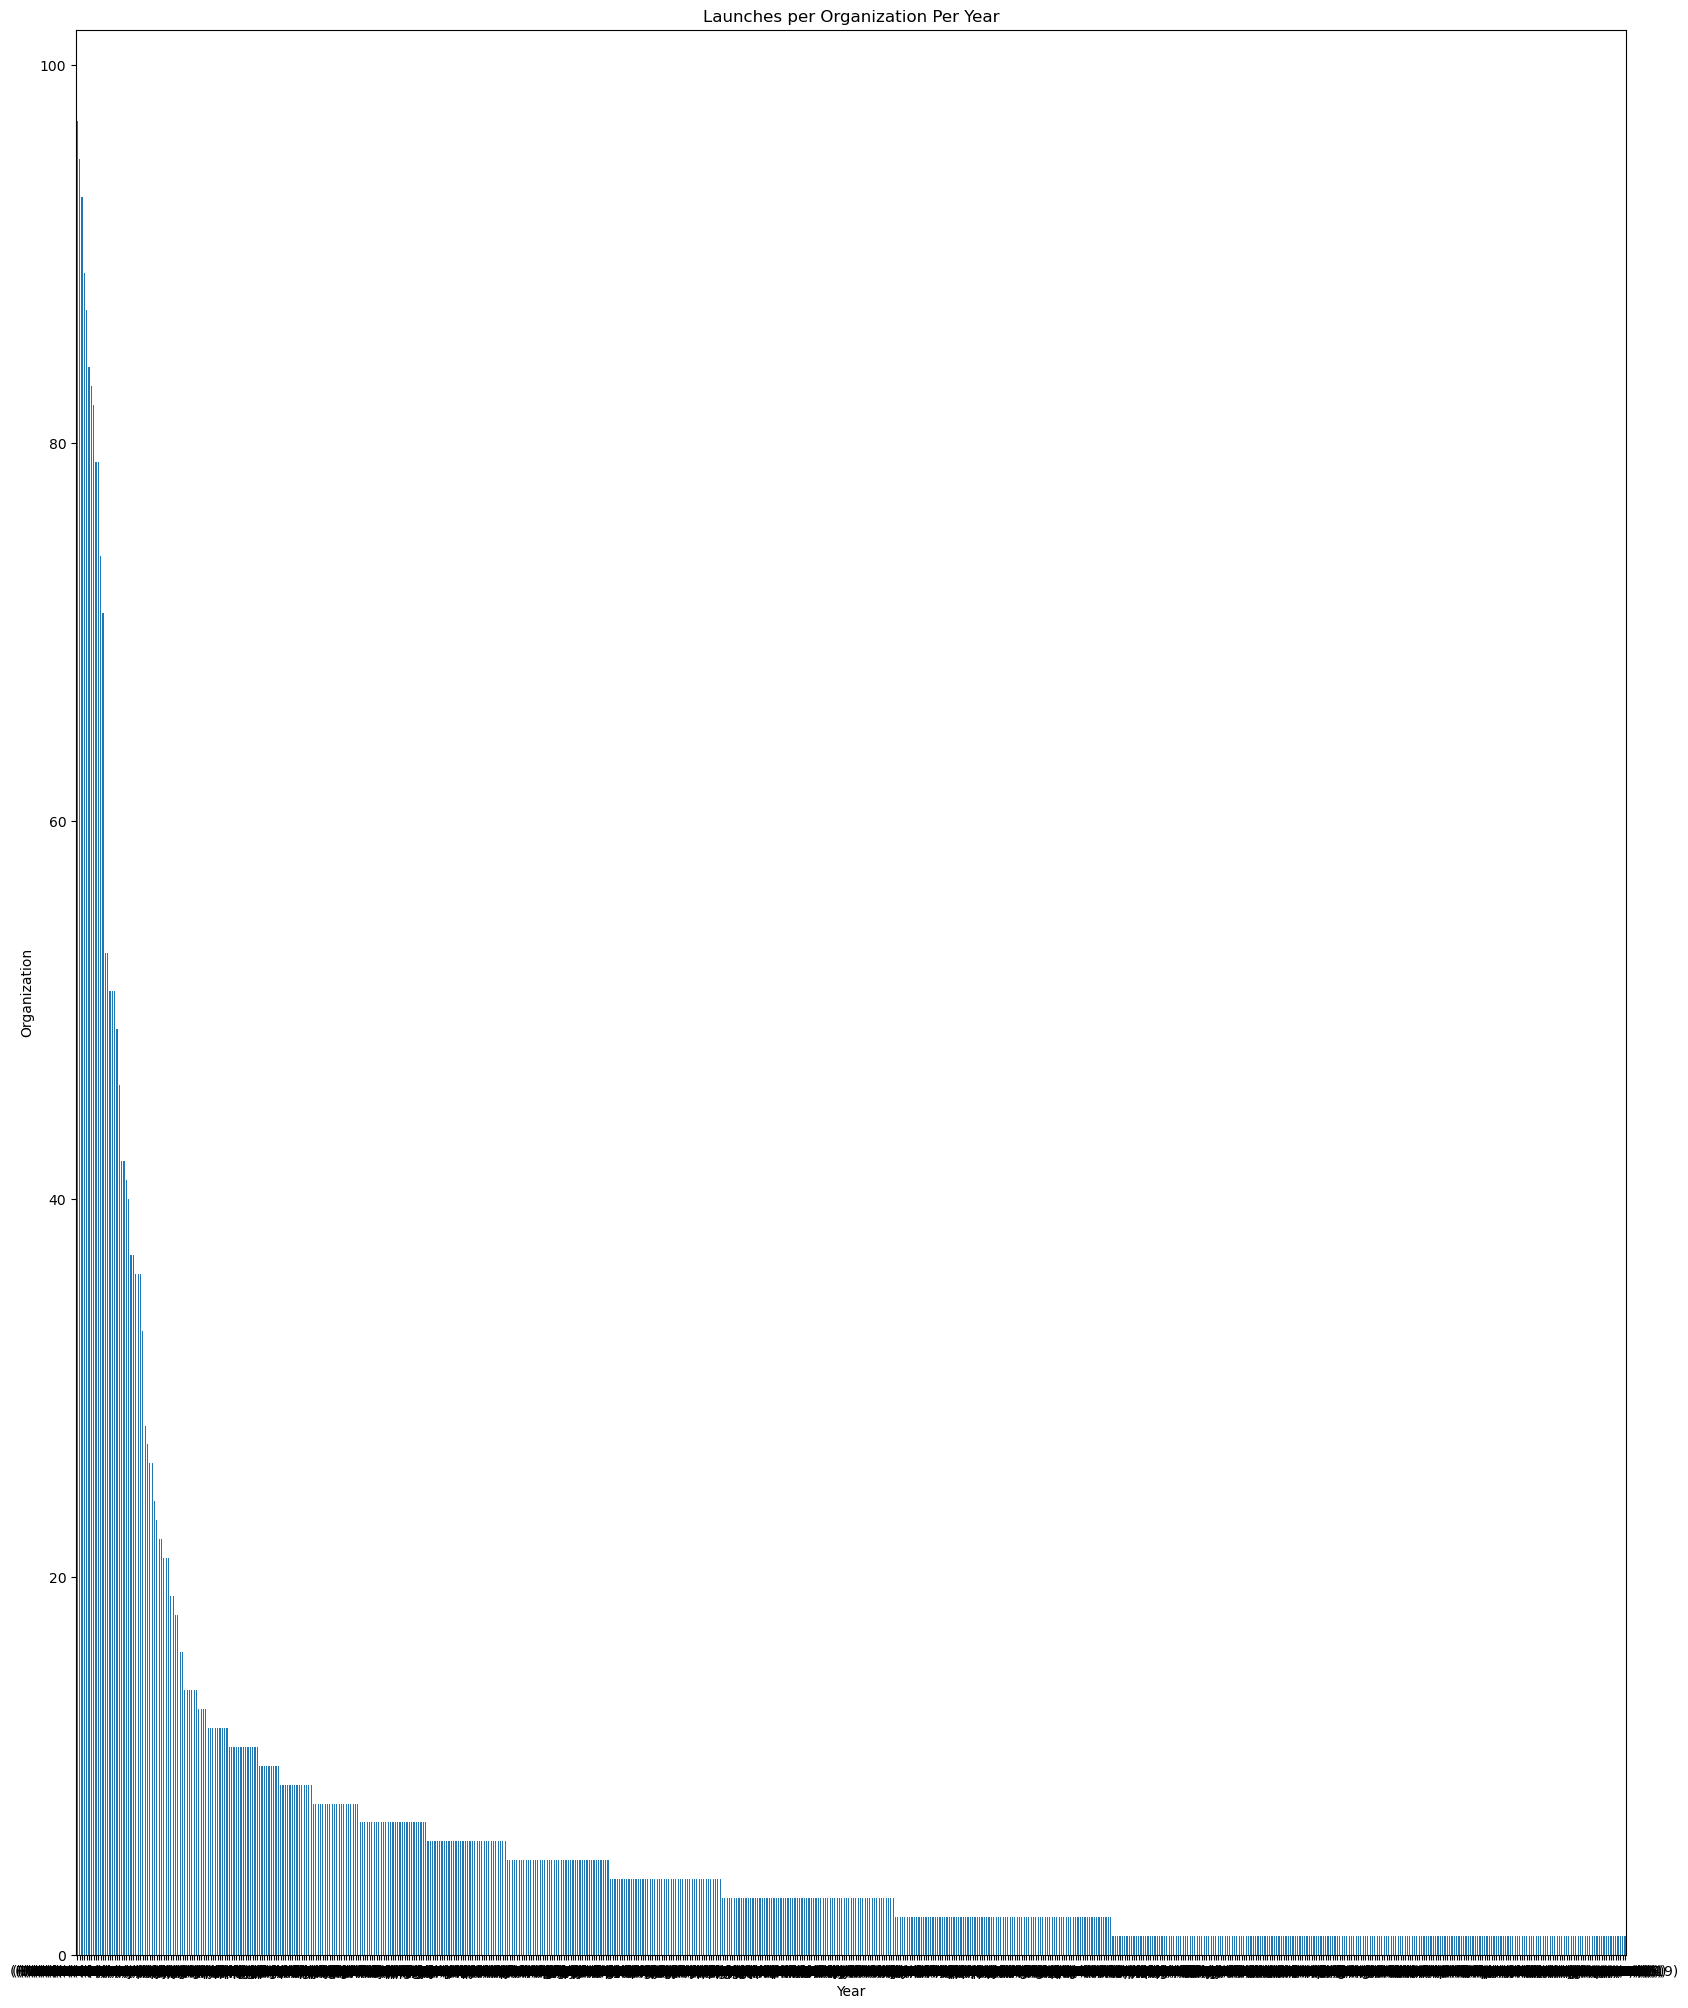

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

org_by_year.plot(kind='bar', rot=0, figsize=(20, 25))
plt.xlabel('Year')
plt.ylabel('Organization')
plt.title('Launches per Organization Per Year')
plt.show()

In [ ]:
org_launches_per_year.reset_index(inplace=True)
org_launches

TypeError: Cannot reset_index inplace on a Series to create a DataFrame

In [ ]:
org_by_year = org_launches_per_year.value_counts().sum()
org_by_year

663

In [ ]:
top_ten_orgs = org_launches_per_year.apply(pd.Series.nlargest, n=10, axis=1).reindex(org_launches.columns, axis=1)
top_ten_orgs

AttributeError: 'list' object has no attribute 'apply'

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [ ]:
#Divide up by launch location, Russian Federation and USA. Must add on Kazahstan  before it became an independent country.
#Kazakhstan independence December 16, 1991
#THE COLD WAR ENDED IN 1991, SO DROP ALL DATES BEFORE 1991 IN A NEW DATAFRAME

In [138]:
df_data.head()

,Organization,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,Year_Only,Month
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00,2020,"Fri Aug 07, 2020 05:12 UTC"
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00,2020,"Thu Aug 06, 2020 04:01 UTC"
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04 23:57:00+00:00,2020,"Tue Aug 04, 2020 23:57 UTC"
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30 21:25:00+00:00,2020,"Thu Jul 30, 2020 21:25 UTC"
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30 11:50:00+00:00,2020,"Thu Jul 30, 2020 11:50 UTC"


In [ ]:
# Find the unique countries
df_data_country = df_data['Country'].unique()
df_data_country

array(['USA', 'China', 'Kazakhstan', 'Japan', 'Israel', 'New Zealand',
       'Russian Federation', 'Iran', 'France', 'India', 'North Korea',
       'South Korea', 'Brazil', 'Kenya', 'Australia'], dtype=object)

In [284]:
df_1991_and_before = df_data.copy()
df_1991_and_before

,Organization,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,Year_Only,Month,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00,2020,"Fri Aug 07, 2020 05:12 UTC",USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00,2020,"Thu Aug 06, 2020 04:01 UTC",China
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04 23:57:00+00:00,2020,"Tue Aug 04, 2020 23:57 UTC",USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30 21:25:00+00:00,2020,"Thu Jul 30, 2020 21:25 UTC",Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30 11:50:00+00:00,2020,"Thu Jul 30, 2020 11:50 UTC",USA
...,...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,1958-02-05 07:33:00+00:00,1958,"Wed Feb 05, 1958 07:33 UTC",USA
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,1958-02-01 03:48:00+00:00,1958,"Sat Feb 01, 1958 03:48 UTC",USA
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,1957-12-06 16:44:00+00:00,1957,"Fri Dec 06, 1957 16:44 UTC",USA
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,1957-11-03 02:30:00+00:00,1957,"Sun Nov 03, 1957 02:30 UTC",Kazakhstan


In [285]:
#Convert date to int
df_1991_and_before['Year_Only'].astype(int)
df_1991_and_before

,Organization,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,Year_Only,Month,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00,2020,"Fri Aug 07, 2020 05:12 UTC",USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00,2020,"Thu Aug 06, 2020 04:01 UTC",China
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04 23:57:00+00:00,2020,"Tue Aug 04, 2020 23:57 UTC",USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30 21:25:00+00:00,2020,"Thu Jul 30, 2020 21:25 UTC",Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30 11:50:00+00:00,2020,"Thu Jul 30, 2020 11:50 UTC",USA
...,...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,1958-02-05 07:33:00+00:00,1958,"Wed Feb 05, 1958 07:33 UTC",USA
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,1958-02-01 03:48:00+00:00,1958,"Sat Feb 01, 1958 03:48 UTC",USA
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,1957-12-06 16:44:00+00:00,1957,"Fri Dec 06, 1957 16:44 UTC",USA
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,1957-11-03 02:30:00+00:00,1957,"Sun Nov 03, 1957 02:30 UTC",Kazakhstan


In [286]:
#Delete everything before 1991 in a new dataframe
df_1991_and_before_split = df_1991_and_before.drop(df_1991_and_before[df_1991_and_before['Year_Only'] >= 1991].index)
df_1991_and_before_split

,Organization,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,Year_Only,Month,Country
1776,RVSN USSR,"Site 32/2, Plesetsk Cosmodrome, Russia","Sat Dec 22, 1990 07:28 UTC",Tsyklon-3 | Cosmos 2114 to 2119,StatusRetired,NaN,Success,1990-12-22 07:28:00+00:00,1990,"Sat Dec 22, 1990 07:28 UTC",Russian Federation
1777,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russia","Mon Dec 10, 1990 07:54 UTC",Cosmos-3M (11K65M) | Cosmos 2112,StatusRetired,NaN,Success,1990-12-10 07:54:00+00:00,1990,"Mon Dec 10, 1990 07:54 UTC",Russian Federation
1778,RVSN USSR,"Site 90/20, Baikonur Cosmodrome, Kazakhstan","Tue Dec 04, 1990 00:48 UTC",Tsyklon-2 | Cosmos 2107,StatusRetired,NaN,Success,1990-12-04 00:48:00+00:00,1990,"Tue Dec 04, 1990 00:48 UTC",Kazakhstan
1779,NASA,"LC-39B, Kennedy Space Center, Florida, USA","Sun Dec 02, 1990 06:49 UTC",Space Shuttle Columbia | STS-35,StatusRetired,450.0,Success,1990-12-02 06:49:00+00:00,1990,"Sun Dec 02, 1990 06:49 UTC",USA
1780,General Dynamics,"SLC-3W, Vandenberg AFB, California, USA","Sat Dec 01, 1990 15:57 UTC",Atlas-E/F Star-37S-ISS | DMSP F-10,StatusRetired,NaN,Success,1990-12-01 15:57:00+00:00,1990,"Sat Dec 01, 1990 15:57 UTC",USA
...,...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,1958-02-05 07:33:00+00:00,1958,"Wed Feb 05, 1958 07:33 UTC",USA
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,1958-02-01 03:48:00+00:00,1958,"Sat Feb 01, 1958 03:48 UTC",USA
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,1957-12-06 16:44:00+00:00,1957,"Fri Dec 06, 1957 16:44 UTC",USA
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,1957-11-03 02:30:00+00:00,1957,"Sun Nov 03, 1957 02:30 UTC",Kazakhstan


In [287]:
#Change Kazahkstan to Russian Federation
df_1991_and_before_split['Country'] = df_1991_and_before_split['Country'].str.replace('Kazakhstan','Russia')
df_1991_and_before_split

,Organization,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,Year_Only,Month,Country
1776,RVSN USSR,"Site 32/2, Plesetsk Cosmodrome, Russia","Sat Dec 22, 1990 07:28 UTC",Tsyklon-3 | Cosmos 2114 to 2119,StatusRetired,NaN,Success,1990-12-22 07:28:00+00:00,1990,"Sat Dec 22, 1990 07:28 UTC",Russian Federation
1777,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russia","Mon Dec 10, 1990 07:54 UTC",Cosmos-3M (11K65M) | Cosmos 2112,StatusRetired,NaN,Success,1990-12-10 07:54:00+00:00,1990,"Mon Dec 10, 1990 07:54 UTC",Russian Federation
1778,RVSN USSR,"Site 90/20, Baikonur Cosmodrome, Kazakhstan","Tue Dec 04, 1990 00:48 UTC",Tsyklon-2 | Cosmos 2107,StatusRetired,NaN,Success,1990-12-04 00:48:00+00:00,1990,"Tue Dec 04, 1990 00:48 UTC",Russia
1779,NASA,"LC-39B, Kennedy Space Center, Florida, USA","Sun Dec 02, 1990 06:49 UTC",Space Shuttle Columbia | STS-35,StatusRetired,450.0,Success,1990-12-02 06:49:00+00:00,1990,"Sun Dec 02, 1990 06:49 UTC",USA
1780,General Dynamics,"SLC-3W, Vandenberg AFB, California, USA","Sat Dec 01, 1990 15:57 UTC",Atlas-E/F Star-37S-ISS | DMSP F-10,StatusRetired,NaN,Success,1990-12-01 15:57:00+00:00,1990,"Sat Dec 01, 1990 15:57 UTC",USA
...,...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,1958-02-05 07:33:00+00:00,1958,"Wed Feb 05, 1958 07:33 UTC",USA
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,1958-02-01 03:48:00+00:00,1958,"Sat Feb 01, 1958 03:48 UTC",USA
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,1957-12-06 16:44:00+00:00,1957,"Fri Dec 06, 1957 16:44 UTC",USA
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,1957-11-03 02:30:00+00:00,1957,"Sun Nov 03, 1957 02:30 UTC",Russia


In [288]:
#Change Kazahkstan to Russian Federation
df_1991_and_before_split['Country'] = df_1991_and_before_split['Country'].str.replace('Russian Federation','Russia')
df_1991_and_before_split

,Organization,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,Year_Only,Month,Country
1776,RVSN USSR,"Site 32/2, Plesetsk Cosmodrome, Russia","Sat Dec 22, 1990 07:28 UTC",Tsyklon-3 | Cosmos 2114 to 2119,StatusRetired,NaN,Success,1990-12-22 07:28:00+00:00,1990,"Sat Dec 22, 1990 07:28 UTC",Russia
1777,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russia","Mon Dec 10, 1990 07:54 UTC",Cosmos-3M (11K65M) | Cosmos 2112,StatusRetired,NaN,Success,1990-12-10 07:54:00+00:00,1990,"Mon Dec 10, 1990 07:54 UTC",Russia
1778,RVSN USSR,"Site 90/20, Baikonur Cosmodrome, Kazakhstan","Tue Dec 04, 1990 00:48 UTC",Tsyklon-2 | Cosmos 2107,StatusRetired,NaN,Success,1990-12-04 00:48:00+00:00,1990,"Tue Dec 04, 1990 00:48 UTC",Russia
1779,NASA,"LC-39B, Kennedy Space Center, Florida, USA","Sun Dec 02, 1990 06:49 UTC",Space Shuttle Columbia | STS-35,StatusRetired,450.0,Success,1990-12-02 06:49:00+00:00,1990,"Sun Dec 02, 1990 06:49 UTC",USA
1780,General Dynamics,"SLC-3W, Vandenberg AFB, California, USA","Sat Dec 01, 1990 15:57 UTC",Atlas-E/F Star-37S-ISS | DMSP F-10,StatusRetired,NaN,Success,1990-12-01 15:57:00+00:00,1990,"Sat Dec 01, 1990 15:57 UTC",USA
...,...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,1958-02-05 07:33:00+00:00,1958,"Wed Feb 05, 1958 07:33 UTC",USA
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,1958-02-01 03:48:00+00:00,1958,"Sat Feb 01, 1958 03:48 UTC",USA
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,1957-12-06 16:44:00+00:00,1957,"Fri Dec 06, 1957 16:44 UTC",USA
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,1957-11-03 02:30:00+00:00,1957,"Sun Nov 03, 1957 02:30 UTC",Russia


In [289]:
# Do the groupby or value_counts and reset the index again before deleting the countries
df_1991_and_before_split['Country'].unique()

array(['Russia', 'USA', 'France', 'China', 'Japan', 'Israel', 'India',
       'Kenya', 'Australia'], dtype=object)

In [296]:
df_powers = df_1991_and_before_split[~df_1991_and_before_split['Country'].str.contains('China')]
df_powers['Country'].unique()

array(['Russia', 'USA', 'France', 'Japan', 'Israel', 'India', 'Kenya',
       'Australia'], dtype=object)

In [297]:
df_powers_1 = df_powers[~df_powers['Country'].str.contains('France')]
df_powers_1['Country'].unique()

array(['Russia', 'USA', 'Japan', 'Israel', 'India', 'Kenya', 'Australia'],
      dtype=object)

In [298]:
df_powers_2 = df_powers_1[~df_powers_1['Country'].str.contains('Israel')]
df_powers_2['Country'].unique()

array(['Russia', 'USA', 'Japan', 'India', 'Kenya', 'Australia'],
      dtype=object)

In [299]:
df_powers_3 = df_powers_2[~df_powers_2['Country'].str.contains('Japan')]
df_powers_3['Country'].unique()

array(['Russia', 'USA', 'India', 'Kenya', 'Australia'], dtype=object)

In [300]:
df_powers_4 = df_powers_3[~df_powers_3['Country'].str.contains('Kenya')]
df_powers_4['Country'].unique()

array(['Russia', 'USA', 'India', 'Australia'], dtype=object)

In [301]:
df_powers_5 = df_powers_4[~df_powers_4['Country'].str.contains('India')]
df_powers_5['Country'].unique()

array(['Russia', 'USA', 'Australia'], dtype=object)

In [303]:
df_powers_6 = df_powers_5[~df_powers_5['Country'].str.contains('Australia')]
df_powers_6['Country'].unique()

array(['Russia', 'USA'], dtype=object)

In [306]:
df_powers_6

,Organization,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,Year_Only,Month,Country
1776,RVSN USSR,"Site 32/2, Plesetsk Cosmodrome, Russia","Sat Dec 22, 1990 07:28 UTC",Tsyklon-3 | Cosmos 2114 to 2119,StatusRetired,NaN,Success,1990-12-22 07:28:00+00:00,1990,"Sat Dec 22, 1990 07:28 UTC",Russia
1777,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russia","Mon Dec 10, 1990 07:54 UTC",Cosmos-3M (11K65M) | Cosmos 2112,StatusRetired,NaN,Success,1990-12-10 07:54:00+00:00,1990,"Mon Dec 10, 1990 07:54 UTC",Russia
1778,RVSN USSR,"Site 90/20, Baikonur Cosmodrome, Kazakhstan","Tue Dec 04, 1990 00:48 UTC",Tsyklon-2 | Cosmos 2107,StatusRetired,NaN,Success,1990-12-04 00:48:00+00:00,1990,"Tue Dec 04, 1990 00:48 UTC",Russia
1779,NASA,"LC-39B, Kennedy Space Center, Florida, USA","Sun Dec 02, 1990 06:49 UTC",Space Shuttle Columbia | STS-35,StatusRetired,450.0,Success,1990-12-02 06:49:00+00:00,1990,"Sun Dec 02, 1990 06:49 UTC",USA
1780,General Dynamics,"SLC-3W, Vandenberg AFB, California, USA","Sat Dec 01, 1990 15:57 UTC",Atlas-E/F Star-37S-ISS | DMSP F-10,StatusRetired,NaN,Success,1990-12-01 15:57:00+00:00,1990,"Sat Dec 01, 1990 15:57 UTC",USA
...,...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,1958-02-05 07:33:00+00:00,1958,"Wed Feb 05, 1958 07:33 UTC",USA
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,1958-02-01 03:48:00+00:00,1958,"Sat Feb 01, 1958 03:48 UTC",USA
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,1957-12-06 16:44:00+00:00,1957,"Fri Dec 06, 1957 16:44 UTC",USA
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,1957-11-03 02:30:00+00:00,1957,"Sun Nov 03, 1957 02:30 UTC",Russia


In [308]:
powers_by_year = df_powers_6.groupby(by=["Country", "Year_Only"], as_index=False).count()
powers_by_year = powers_by_year.sort_values("Year_Only")[["Year_Only", "Country"]]
powers_by_year.reset_index(inplace=True) 
powers_by_year

,index,Year_Only,Country
0,0,1957,Russia
1,34,1957,USA
2,1,1958,Russia
3,35,1958,USA
4,2,1959,Russia
...,...,...,...
63,31,1988,Russia
64,66,1989,USA
65,32,1989,Russia
66,33,1990,Russia


In [309]:
powers_by_year=powers_by_year.rename(columns = {'index':'Launches'})

In [310]:
import plotly.express as px


fig = px.pie(powers_by_year, values='Launches', names='Country', title='Cold War Launches per Superpower')
fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [ ]:
#Divide up by launch location, Russian Federation and USA. Must add on Kazahstan and Ukraine before they became independent countries.
#Kazakhstan independence December 16, 1991
#Ukraine Independence August 24, 1991
#PLAN
#Delete everything before 1991 in a new dataframe
#Change Kazahkstan to Russian Federation
#Delete every country except USA and Russian Federation
#Change Russian Federation to Russia
#Delete columns, keeping only Year and Country
#Make a dataframe of the total number of launches per year per country using counts
#Make a chart


In [123]:
df_data.head()

,Organization,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,Year_Only,Month
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00,2020,"Fri Aug 07, 2020 05:12 UTC"
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00,2020,"Thu Aug 06, 2020 04:01 UTC"
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04 23:57:00+00:00,2020,"Tue Aug 04, 2020 23:57 UTC"
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30 21:25:00+00:00,2020,"Thu Jul 30, 2020 21:25 UTC"
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30 11:50:00+00:00,2020,"Thu Jul 30, 2020 11:50 UTC"


In [125]:
df_1991_and_before = df_data.copy()
df_1991_and_before


,Organization,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,Year_Only,Month
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00,2020,"Fri Aug 07, 2020 05:12 UTC"
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00,2020,"Thu Aug 06, 2020 04:01 UTC"
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04 23:57:00+00:00,2020,"Tue Aug 04, 2020 23:57 UTC"
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30 21:25:00+00:00,2020,"Thu Jul 30, 2020 21:25 UTC"
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30 11:50:00+00:00,2020,"Thu Jul 30, 2020 11:50 UTC"
...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,1958-02-05 07:33:00+00:00,1958,"Wed Feb 05, 1958 07:33 UTC"
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,1958-02-01 03:48:00+00:00,1958,"Sat Feb 01, 1958 03:48 UTC"
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,1957-12-06 16:44:00+00:00,1957,"Fri Dec 06, 1957 16:44 UTC"
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,1957-11-03 02:30:00+00:00,1957,"Sun Nov 03, 1957 02:30 UTC"


In [130]:
#Convert date to int
df_1991_and_before['Year_Only'].astype(int)
df_1991_and_before


,Organization,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,Year_Only,Month
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00,2020,"Fri Aug 07, 2020 05:12 UTC"
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00,2020,"Thu Aug 06, 2020 04:01 UTC"
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04 23:57:00+00:00,2020,"Tue Aug 04, 2020 23:57 UTC"
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30 21:25:00+00:00,2020,"Thu Jul 30, 2020 21:25 UTC"
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30 11:50:00+00:00,2020,"Thu Jul 30, 2020 11:50 UTC"
...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,1958-02-05 07:33:00+00:00,1958,"Wed Feb 05, 1958 07:33 UTC"
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,1958-02-01 03:48:00+00:00,1958,"Sat Feb 01, 1958 03:48 UTC"
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,1957-12-06 16:44:00+00:00,1957,"Fri Dec 06, 1957 16:44 UTC"
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,1957-11-03 02:30:00+00:00,1957,"Sun Nov 03, 1957 02:30 UTC"


In [136]:
#Delete everything before 1991 in a new dataframe
df_1991_and_before_split = df_1991_and_before.drop(df_1991_and_before[df_1991_and_before['Year_Only'] >= 1991].index)
df_1991_and_before_split


,Organization,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,Year_Only,Month
1776,RVSN USSR,"Site 32/2, Plesetsk Cosmodrome, Russia","Sat Dec 22, 1990 07:28 UTC",Tsyklon-3 | Cosmos 2114 to 2119,StatusRetired,NaN,Success,1990-12-22 07:28:00+00:00,1990,"Sat Dec 22, 1990 07:28 UTC"
1777,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russia","Mon Dec 10, 1990 07:54 UTC",Cosmos-3M (11K65M) | Cosmos 2112,StatusRetired,NaN,Success,1990-12-10 07:54:00+00:00,1990,"Mon Dec 10, 1990 07:54 UTC"
1778,RVSN USSR,"Site 90/20, Baikonur Cosmodrome, Kazakhstan","Tue Dec 04, 1990 00:48 UTC",Tsyklon-2 | Cosmos 2107,StatusRetired,NaN,Success,1990-12-04 00:48:00+00:00,1990,"Tue Dec 04, 1990 00:48 UTC"
1779,NASA,"LC-39B, Kennedy Space Center, Florida, USA","Sun Dec 02, 1990 06:49 UTC",Space Shuttle Columbia | STS-35,StatusRetired,450.0,Success,1990-12-02 06:49:00+00:00,1990,"Sun Dec 02, 1990 06:49 UTC"
1780,General Dynamics,"SLC-3W, Vandenberg AFB, California, USA","Sat Dec 01, 1990 15:57 UTC",Atlas-E/F Star-37S-ISS | DMSP F-10,StatusRetired,NaN,Success,1990-12-01 15:57:00+00:00,1990,"Sat Dec 01, 1990 15:57 UTC"
...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,1958-02-05 07:33:00+00:00,1958,"Wed Feb 05, 1958 07:33 UTC"
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,1958-02-01 03:48:00+00:00,1958,"Sat Feb 01, 1958 03:48 UTC"
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,1957-12-06 16:44:00+00:00,1957,"Fri Dec 06, 1957 16:44 UTC"
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,1957-11-03 02:30:00+00:00,1957,"Sun Nov 03, 1957 02:30 UTC"


In [139]:
df_1991_and_before_split['Country'] = df_data.loc[:, "Location"]
df_1991_and_before_split.head()

,Organization,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,Year_Only,Month,Country
1776,RVSN USSR,"Site 32/2, Plesetsk Cosmodrome, Russia","Sat Dec 22, 1990 07:28 UTC",Tsyklon-3 | Cosmos 2114 to 2119,StatusRetired,NaN,Success,1990-12-22 07:28:00+00:00,1990,"Sat Dec 22, 1990 07:28 UTC","Site 32/2, Plesetsk Cosmodrome, Russia"
1777,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russia","Mon Dec 10, 1990 07:54 UTC",Cosmos-3M (11K65M) | Cosmos 2112,StatusRetired,NaN,Success,1990-12-10 07:54:00+00:00,1990,"Mon Dec 10, 1990 07:54 UTC","Site 133/3, Plesetsk Cosmodrome, Russia"
1778,RVSN USSR,"Site 90/20, Baikonur Cosmodrome, Kazakhstan","Tue Dec 04, 1990 00:48 UTC",Tsyklon-2 | Cosmos 2107,StatusRetired,NaN,Success,1990-12-04 00:48:00+00:00,1990,"Tue Dec 04, 1990 00:48 UTC","Site 90/20, Baikonur Cosmodrome, Kazakhstan"
1779,NASA,"LC-39B, Kennedy Space Center, Florida, USA","Sun Dec 02, 1990 06:49 UTC",Space Shuttle Columbia | STS-35,StatusRetired,450.0,Success,1990-12-02 06:49:00+00:00,1990,"Sun Dec 02, 1990 06:49 UTC","LC-39B, Kennedy Space Center, Florida, USA"
1780,General Dynamics,"SLC-3W, Vandenberg AFB, California, USA","Sat Dec 01, 1990 15:57 UTC",Atlas-E/F Star-37S-ISS | DMSP F-10,StatusRetired,NaN,Success,1990-12-01 15:57:00+00:00,1990,"Sat Dec 01, 1990 15:57 UTC","SLC-3W, Vandenberg AFB, California, USA"


In [141]:
# Next, delete everything before the last comma
df_1991_and_before_split['Country'] = df_1991_and_before_split['Country'].str.split(',').str[-1].str.strip()
df_1991_and_before_split.head()

,Organization,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,Year_Only,Month,Country
1776,RVSN USSR,"Site 32/2, Plesetsk Cosmodrome, Russia","Sat Dec 22, 1990 07:28 UTC",Tsyklon-3 | Cosmos 2114 to 2119,StatusRetired,NaN,Success,1990-12-22 07:28:00+00:00,1990,"Sat Dec 22, 1990 07:28 UTC",Russia
1777,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russia","Mon Dec 10, 1990 07:54 UTC",Cosmos-3M (11K65M) | Cosmos 2112,StatusRetired,NaN,Success,1990-12-10 07:54:00+00:00,1990,"Mon Dec 10, 1990 07:54 UTC",Russia
1778,RVSN USSR,"Site 90/20, Baikonur Cosmodrome, Kazakhstan","Tue Dec 04, 1990 00:48 UTC",Tsyklon-2 | Cosmos 2107,StatusRetired,NaN,Success,1990-12-04 00:48:00+00:00,1990,"Tue Dec 04, 1990 00:48 UTC",Kazakhstan
1779,NASA,"LC-39B, Kennedy Space Center, Florida, USA","Sun Dec 02, 1990 06:49 UTC",Space Shuttle Columbia | STS-35,StatusRetired,450.0,Success,1990-12-02 06:49:00+00:00,1990,"Sun Dec 02, 1990 06:49 UTC",USA
1780,General Dynamics,"SLC-3W, Vandenberg AFB, California, USA","Sat Dec 01, 1990 15:57 UTC",Atlas-E/F Star-37S-ISS | DMSP F-10,StatusRetired,NaN,Success,1990-12-01 15:57:00+00:00,1990,"Sat Dec 01, 1990 15:57 UTC",USA


In [142]:
#Change Kazahkstan to Russian Federation
df_1991_and_before_split['Country'] = df_1991_and_before_split['Country'].str.replace('Kazakhstan','Russia')
df_1991_and_before_split


,Organization,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,Year_Only,Month,Country
1776,RVSN USSR,"Site 32/2, Plesetsk Cosmodrome, Russia","Sat Dec 22, 1990 07:28 UTC",Tsyklon-3 | Cosmos 2114 to 2119,StatusRetired,NaN,Success,1990-12-22 07:28:00+00:00,1990,"Sat Dec 22, 1990 07:28 UTC",Russia
1777,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russia","Mon Dec 10, 1990 07:54 UTC",Cosmos-3M (11K65M) | Cosmos 2112,StatusRetired,NaN,Success,1990-12-10 07:54:00+00:00,1990,"Mon Dec 10, 1990 07:54 UTC",Russia
1778,RVSN USSR,"Site 90/20, Baikonur Cosmodrome, Kazakhstan","Tue Dec 04, 1990 00:48 UTC",Tsyklon-2 | Cosmos 2107,StatusRetired,NaN,Success,1990-12-04 00:48:00+00:00,1990,"Tue Dec 04, 1990 00:48 UTC",Russia
1779,NASA,"LC-39B, Kennedy Space Center, Florida, USA","Sun Dec 02, 1990 06:49 UTC",Space Shuttle Columbia | STS-35,StatusRetired,450.0,Success,1990-12-02 06:49:00+00:00,1990,"Sun Dec 02, 1990 06:49 UTC",USA
1780,General Dynamics,"SLC-3W, Vandenberg AFB, California, USA","Sat Dec 01, 1990 15:57 UTC",Atlas-E/F Star-37S-ISS | DMSP F-10,StatusRetired,NaN,Success,1990-12-01 15:57:00+00:00,1990,"Sat Dec 01, 1990 15:57 UTC",USA
...,...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,1958-02-05 07:33:00+00:00,1958,"Wed Feb 05, 1958 07:33 UTC",USA
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,1958-02-01 03:48:00+00:00,1958,"Sat Feb 01, 1958 03:48 UTC",USA
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,1957-12-06 16:44:00+00:00,1957,"Fri Dec 06, 1957 16:44 UTC",USA
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,1957-11-03 02:30:00+00:00,1957,"Sun Nov 03, 1957 02:30 UTC",Russia


In [143]:
df_1991_and_before_split['Country'].unique()

array(['Russia', 'USA', 'France', 'China', 'Japan', 'Israel', 'India',
       'Kenya', 'Australia'], dtype=object)

In [148]:
#Delete every country except USA and Russia
df_1991 = df_1991_and_before_split[~df_1991_and_before_split['Country'].str.contains('France', 'China')].reset_index(drop=True)
df_1991

,Organization,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,Year_Only,Month,Country
0,RVSN USSR,"Site 32/2, Plesetsk Cosmodrome, Russia","Sat Dec 22, 1990 07:28 UTC",Tsyklon-3 | Cosmos 2114 to 2119,StatusRetired,NaN,Success,1990-12-22 07:28:00+00:00,1990,"Sat Dec 22, 1990 07:28 UTC",Russia
1,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russia","Mon Dec 10, 1990 07:54 UTC",Cosmos-3M (11K65M) | Cosmos 2112,StatusRetired,NaN,Success,1990-12-10 07:54:00+00:00,1990,"Mon Dec 10, 1990 07:54 UTC",Russia
2,RVSN USSR,"Site 90/20, Baikonur Cosmodrome, Kazakhstan","Tue Dec 04, 1990 00:48 UTC",Tsyklon-2 | Cosmos 2107,StatusRetired,NaN,Success,1990-12-04 00:48:00+00:00,1990,"Tue Dec 04, 1990 00:48 UTC",Russia
3,NASA,"LC-39B, Kennedy Space Center, Florida, USA","Sun Dec 02, 1990 06:49 UTC",Space Shuttle Columbia | STS-35,StatusRetired,450.0,Success,1990-12-02 06:49:00+00:00,1990,"Sun Dec 02, 1990 06:49 UTC",USA
4,General Dynamics,"SLC-3W, Vandenberg AFB, California, USA","Sat Dec 01, 1990 15:57 UTC",Atlas-E/F Star-37S-ISS | DMSP F-10,StatusRetired,NaN,Success,1990-12-01 15:57:00+00:00,1990,"Sat Dec 01, 1990 15:57 UTC",USA
...,...,...,...,...,...,...,...,...,...,...,...
2490,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,1958-02-05 07:33:00+00:00,1958,"Wed Feb 05, 1958 07:33 UTC",USA
2491,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,1958-02-01 03:48:00+00:00,1958,"Sat Feb 01, 1958 03:48 UTC",USA
2492,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,1957-12-06 16:44:00+00:00,1957,"Fri Dec 06, 1957 16:44 UTC",USA
2493,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,1957-11-03 02:30:00+00:00,1957,"Sun Nov 03, 1957 02:30 UTC",Russia


In [158]:
#Delete every country except USA and Russia
df_1991_and = df_1991[~df_1991['Country'].str.contains('Japan', 'Israel')].reset_index(drop=True)
df_1991_and

,Organization,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,Year_Only,Month,Country
0,RVSN USSR,"Site 32/2, Plesetsk Cosmodrome, Russia","Sat Dec 22, 1990 07:28 UTC",Tsyklon-3 | Cosmos 2114 to 2119,StatusRetired,NaN,Success,1990-12-22 07:28:00+00:00,1990,"Sat Dec 22, 1990 07:28 UTC",Russia
1,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russia","Mon Dec 10, 1990 07:54 UTC",Cosmos-3M (11K65M) | Cosmos 2112,StatusRetired,NaN,Success,1990-12-10 07:54:00+00:00,1990,"Mon Dec 10, 1990 07:54 UTC",Russia
2,RVSN USSR,"Site 90/20, Baikonur Cosmodrome, Kazakhstan","Tue Dec 04, 1990 00:48 UTC",Tsyklon-2 | Cosmos 2107,StatusRetired,NaN,Success,1990-12-04 00:48:00+00:00,1990,"Tue Dec 04, 1990 00:48 UTC",Russia
3,NASA,"LC-39B, Kennedy Space Center, Florida, USA","Sun Dec 02, 1990 06:49 UTC",Space Shuttle Columbia | STS-35,StatusRetired,450.0,Success,1990-12-02 06:49:00+00:00,1990,"Sun Dec 02, 1990 06:49 UTC",USA
4,General Dynamics,"SLC-3W, Vandenberg AFB, California, USA","Sat Dec 01, 1990 15:57 UTC",Atlas-E/F Star-37S-ISS | DMSP F-10,StatusRetired,NaN,Success,1990-12-01 15:57:00+00:00,1990,"Sat Dec 01, 1990 15:57 UTC",USA
...,...,...,...,...,...,...,...,...,...,...,...
2492,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,1958-02-05 07:33:00+00:00,1958,"Wed Feb 05, 1958 07:33 UTC",USA
2493,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,1958-02-01 03:48:00+00:00,1958,"Sat Feb 01, 1958 03:48 UTC",USA
2494,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,1957-12-06 16:44:00+00:00,1957,"Fri Dec 06, 1957 16:44 UTC",USA
2495,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,1957-11-03 02:30:00+00:00,1957,"Sun Nov 03, 1957 02:30 UTC",Russia


In [159]:
df_1991_and['Country'].unique()

array(['Russia', 'USA', 'France', 'China', 'India', 'Kenya', 'Australia'],
      dtype=object)

In [160]:
#Delete every country except USA and Russia
df_1991_2 = df_1991_and[~df_1991_and['Country'].str.contains('India', 'Kenya')].reset_index(drop=True)
df_1991_2

,Organization,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,Year_Only,Month,Country
0,RVSN USSR,"Site 32/2, Plesetsk Cosmodrome, Russia","Sat Dec 22, 1990 07:28 UTC",Tsyklon-3 | Cosmos 2114 to 2119,StatusRetired,NaN,Success,1990-12-22 07:28:00+00:00,1990,"Sat Dec 22, 1990 07:28 UTC",Russia
1,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russia","Mon Dec 10, 1990 07:54 UTC",Cosmos-3M (11K65M) | Cosmos 2112,StatusRetired,NaN,Success,1990-12-10 07:54:00+00:00,1990,"Mon Dec 10, 1990 07:54 UTC",Russia
2,RVSN USSR,"Site 90/20, Baikonur Cosmodrome, Kazakhstan","Tue Dec 04, 1990 00:48 UTC",Tsyklon-2 | Cosmos 2107,StatusRetired,NaN,Success,1990-12-04 00:48:00+00:00,1990,"Tue Dec 04, 1990 00:48 UTC",Russia
3,NASA,"LC-39B, Kennedy Space Center, Florida, USA","Sun Dec 02, 1990 06:49 UTC",Space Shuttle Columbia | STS-35,StatusRetired,450.0,Success,1990-12-02 06:49:00+00:00,1990,"Sun Dec 02, 1990 06:49 UTC",USA
4,General Dynamics,"SLC-3W, Vandenberg AFB, California, USA","Sat Dec 01, 1990 15:57 UTC",Atlas-E/F Star-37S-ISS | DMSP F-10,StatusRetired,NaN,Success,1990-12-01 15:57:00+00:00,1990,"Sat Dec 01, 1990 15:57 UTC",USA
...,...,...,...,...,...,...,...,...,...,...,...
2485,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,1958-02-05 07:33:00+00:00,1958,"Wed Feb 05, 1958 07:33 UTC",USA
2486,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,1958-02-01 03:48:00+00:00,1958,"Sat Feb 01, 1958 03:48 UTC",USA
2487,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,1957-12-06 16:44:00+00:00,1957,"Fri Dec 06, 1957 16:44 UTC",USA
2488,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,1957-11-03 02:30:00+00:00,1957,"Sun Nov 03, 1957 02:30 UTC",Russia


In [162]:
df_1991_2['Country'].unique()

array(['Russia', 'USA', 'France', 'China', 'Kenya', 'Australia'],
      dtype=object)

In [169]:
#Delete every country except USA and Russia
df_1991_3 = df_1991_2[~df_1991_2['Country'].str.contains('China', 'Kenya')].reset_index(drop=True)
df_1991_3

,Organization,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,Year_Only,Month,Country
0,RVSN USSR,"Site 32/2, Plesetsk Cosmodrome, Russia","Sat Dec 22, 1990 07:28 UTC",Tsyklon-3 | Cosmos 2114 to 2119,StatusRetired,NaN,Success,1990-12-22 07:28:00+00:00,1990,"Sat Dec 22, 1990 07:28 UTC",Russia
1,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russia","Mon Dec 10, 1990 07:54 UTC",Cosmos-3M (11K65M) | Cosmos 2112,StatusRetired,NaN,Success,1990-12-10 07:54:00+00:00,1990,"Mon Dec 10, 1990 07:54 UTC",Russia
2,RVSN USSR,"Site 90/20, Baikonur Cosmodrome, Kazakhstan","Tue Dec 04, 1990 00:48 UTC",Tsyklon-2 | Cosmos 2107,StatusRetired,NaN,Success,1990-12-04 00:48:00+00:00,1990,"Tue Dec 04, 1990 00:48 UTC",Russia
3,NASA,"LC-39B, Kennedy Space Center, Florida, USA","Sun Dec 02, 1990 06:49 UTC",Space Shuttle Columbia | STS-35,StatusRetired,450.0,Success,1990-12-02 06:49:00+00:00,1990,"Sun Dec 02, 1990 06:49 UTC",USA
4,General Dynamics,"SLC-3W, Vandenberg AFB, California, USA","Sat Dec 01, 1990 15:57 UTC",Atlas-E/F Star-37S-ISS | DMSP F-10,StatusRetired,NaN,Success,1990-12-01 15:57:00+00:00,1990,"Sat Dec 01, 1990 15:57 UTC",USA
...,...,...,...,...,...,...,...,...,...,...,...
2448,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,1958-02-05 07:33:00+00:00,1958,"Wed Feb 05, 1958 07:33 UTC",USA
2449,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,1958-02-01 03:48:00+00:00,1958,"Sat Feb 01, 1958 03:48 UTC",USA
2450,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,1957-12-06 16:44:00+00:00,1957,"Fri Dec 06, 1957 16:44 UTC",USA
2451,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,1957-11-03 02:30:00+00:00,1957,"Sun Nov 03, 1957 02:30 UTC",Russia


In [170]:
df_1991_3['Country'].unique()

array(['Russia', 'USA', 'France', 'Kenya', 'Australia'], dtype=object)

In [173]:
#Delete every country except USA and Russia
df_1991_and_4 = df_1991_3[~df_1991_3['Country'].str.contains('France', 'Kenya')].reset_index(drop=True)
df_1991_and_4

,Organization,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,Year_Only,Month,Country
0,RVSN USSR,"Site 32/2, Plesetsk Cosmodrome, Russia","Sat Dec 22, 1990 07:28 UTC",Tsyklon-3 | Cosmos 2114 to 2119,StatusRetired,NaN,Success,1990-12-22 07:28:00+00:00,1990,"Sat Dec 22, 1990 07:28 UTC",Russia
1,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russia","Mon Dec 10, 1990 07:54 UTC",Cosmos-3M (11K65M) | Cosmos 2112,StatusRetired,NaN,Success,1990-12-10 07:54:00+00:00,1990,"Mon Dec 10, 1990 07:54 UTC",Russia
2,RVSN USSR,"Site 90/20, Baikonur Cosmodrome, Kazakhstan","Tue Dec 04, 1990 00:48 UTC",Tsyklon-2 | Cosmos 2107,StatusRetired,NaN,Success,1990-12-04 00:48:00+00:00,1990,"Tue Dec 04, 1990 00:48 UTC",Russia
3,NASA,"LC-39B, Kennedy Space Center, Florida, USA","Sun Dec 02, 1990 06:49 UTC",Space Shuttle Columbia | STS-35,StatusRetired,450.0,Success,1990-12-02 06:49:00+00:00,1990,"Sun Dec 02, 1990 06:49 UTC",USA
4,General Dynamics,"SLC-3W, Vandenberg AFB, California, USA","Sat Dec 01, 1990 15:57 UTC",Atlas-E/F Star-37S-ISS | DMSP F-10,StatusRetired,NaN,Success,1990-12-01 15:57:00+00:00,1990,"Sat Dec 01, 1990 15:57 UTC",USA
...,...,...,...,...,...,...,...,...,...,...,...
2395,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,1958-02-05 07:33:00+00:00,1958,"Wed Feb 05, 1958 07:33 UTC",USA
2396,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,1958-02-01 03:48:00+00:00,1958,"Sat Feb 01, 1958 03:48 UTC",USA
2397,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,1957-12-06 16:44:00+00:00,1957,"Fri Dec 06, 1957 16:44 UTC",USA
2398,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,1957-11-03 02:30:00+00:00,1957,"Sun Nov 03, 1957 02:30 UTC",Russia


In [175]:
df_1991_and_4['Country'].unique()

array(['Russia', 'USA', 'Kenya', 'Australia'], dtype=object)

In [176]:
#Delete every country except USA and Russia
df_1991_and_5 = df_1991_and_4[~df_1991_and_4['Country'].str.contains('Kenya')].reset_index(drop=True)
df_1991_and_5

,Organization,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,Year_Only,Month,Country
0,RVSN USSR,"Site 32/2, Plesetsk Cosmodrome, Russia","Sat Dec 22, 1990 07:28 UTC",Tsyklon-3 | Cosmos 2114 to 2119,StatusRetired,NaN,Success,1990-12-22 07:28:00+00:00,1990,"Sat Dec 22, 1990 07:28 UTC",Russia
1,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russia","Mon Dec 10, 1990 07:54 UTC",Cosmos-3M (11K65M) | Cosmos 2112,StatusRetired,NaN,Success,1990-12-10 07:54:00+00:00,1990,"Mon Dec 10, 1990 07:54 UTC",Russia
2,RVSN USSR,"Site 90/20, Baikonur Cosmodrome, Kazakhstan","Tue Dec 04, 1990 00:48 UTC",Tsyklon-2 | Cosmos 2107,StatusRetired,NaN,Success,1990-12-04 00:48:00+00:00,1990,"Tue Dec 04, 1990 00:48 UTC",Russia
3,NASA,"LC-39B, Kennedy Space Center, Florida, USA","Sun Dec 02, 1990 06:49 UTC",Space Shuttle Columbia | STS-35,StatusRetired,450.0,Success,1990-12-02 06:49:00+00:00,1990,"Sun Dec 02, 1990 06:49 UTC",USA
4,General Dynamics,"SLC-3W, Vandenberg AFB, California, USA","Sat Dec 01, 1990 15:57 UTC",Atlas-E/F Star-37S-ISS | DMSP F-10,StatusRetired,NaN,Success,1990-12-01 15:57:00+00:00,1990,"Sat Dec 01, 1990 15:57 UTC",USA
...,...,...,...,...,...,...,...,...,...,...,...
2386,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,1958-02-05 07:33:00+00:00,1958,"Wed Feb 05, 1958 07:33 UTC",USA
2387,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,1958-02-01 03:48:00+00:00,1958,"Sat Feb 01, 1958 03:48 UTC",USA
2388,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,1957-12-06 16:44:00+00:00,1957,"Fri Dec 06, 1957 16:44 UTC",USA
2389,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,1957-11-03 02:30:00+00:00,1957,"Sun Nov 03, 1957 02:30 UTC",Russia


In [177]:
df_1991_and_5['Country'].unique()

array(['Russia', 'USA', 'Australia'], dtype=object)

In [180]:
df_1991_powers = df_1991_and_5[~df_1991_and_5['Country'].str.contains('Australia')].reset_index(drop=True)
df_1991_powers 

,Organization,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,Year_Only,Month,Country
0,RVSN USSR,"Site 32/2, Plesetsk Cosmodrome, Russia","Sat Dec 22, 1990 07:28 UTC",Tsyklon-3 | Cosmos 2114 to 2119,StatusRetired,NaN,Success,1990-12-22 07:28:00+00:00,1990,"Sat Dec 22, 1990 07:28 UTC",Russia
1,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russia","Mon Dec 10, 1990 07:54 UTC",Cosmos-3M (11K65M) | Cosmos 2112,StatusRetired,NaN,Success,1990-12-10 07:54:00+00:00,1990,"Mon Dec 10, 1990 07:54 UTC",Russia
2,RVSN USSR,"Site 90/20, Baikonur Cosmodrome, Kazakhstan","Tue Dec 04, 1990 00:48 UTC",Tsyklon-2 | Cosmos 2107,StatusRetired,NaN,Success,1990-12-04 00:48:00+00:00,1990,"Tue Dec 04, 1990 00:48 UTC",Russia
3,NASA,"LC-39B, Kennedy Space Center, Florida, USA","Sun Dec 02, 1990 06:49 UTC",Space Shuttle Columbia | STS-35,StatusRetired,450.0,Success,1990-12-02 06:49:00+00:00,1990,"Sun Dec 02, 1990 06:49 UTC",USA
4,General Dynamics,"SLC-3W, Vandenberg AFB, California, USA","Sat Dec 01, 1990 15:57 UTC",Atlas-E/F Star-37S-ISS | DMSP F-10,StatusRetired,NaN,Success,1990-12-01 15:57:00+00:00,1990,"Sat Dec 01, 1990 15:57 UTC",USA
...,...,...,...,...,...,...,...,...,...,...,...
2380,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,1958-02-05 07:33:00+00:00,1958,"Wed Feb 05, 1958 07:33 UTC",USA
2381,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,1958-02-01 03:48:00+00:00,1958,"Sat Feb 01, 1958 03:48 UTC",USA
2382,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,1957-12-06 16:44:00+00:00,1957,"Fri Dec 06, 1957 16:44 UTC",USA
2383,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,1957-11-03 02:30:00+00:00,1957,"Sun Nov 03, 1957 02:30 UTC",Russia


In [181]:
df_1991_powers['Country'].unique()

array(['Russia', 'USA'], dtype=object)

In [183]:
#Make a dataframe of the total number of launches per year per country using counts
#Make a chart
df_1991_powers_launches = df_1991_powers[['Country', 'Year_Only']]
df_1991_powers_launches

,Country,Year_Only
0,Russia,1990
1,Russia,1990
2,Russia,1990
3,USA,1990
4,USA,1990
...,...,...
2380,USA,1958
2381,USA,1958
2382,USA,1957
2383,Russia,1957


In [ ]:
# Make a dataframe of the total number of launches per year per country using counts
# Need Year, Country, Counts in a dataframe
# Make a chart

In [200]:
counts_by_year = df_1991_powers_launches.groupby(by=["Country", "Year_Only"], as_index=False).count()
counts_by_year = counts_by_year.sort_values("Year_Only")[["Year_Only", "Country"]]
counts_by_year.reset_index(inplace=True) 
counts_by_year

,index,Year_Only,Country
0,0,1957,Russia
1,34,1957,USA
2,1,1958,Russia
3,35,1958,USA
4,2,1959,Russia
...,...,...,...
63,31,1988,Russia
64,66,1989,USA
65,32,1989,Russia
66,33,1990,Russia


In [201]:
# Change index to Launches
counts_by_year=counts_by_year.rename(columns = {'index':'Launches'})
counts_by_year

,Launches,Year_Only,Country
0,0,1957,Russia
1,34,1957,USA
2,1,1958,Russia
3,35,1958,USA
4,2,1959,Russia
...,...,...,...
63,31,1988,Russia
64,66,1989,USA
65,32,1989,Russia
66,33,1990,Russia


In [203]:
# Make a chart, bar or line, of # of launches(counts) per year
l_chart = px.line(counts_by_year,
                  x="Year_Only", 
                  y="Launches",
                  color="Country",
                  hover_name="Launches")
 
l_chart.update_layout(xaxis_title="Year",
                      yaxis_title="Launches")
 
l_chart.show()

## Chart the Total Number of Mission Failures Year on Year.

In [ ]:
df_data.head()

,Organization,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Country_codes,Year_Only,Month
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA,2020,2020-08-07 05:12:00+00:00
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN,2020,2020-08-06 04:01:00+00:00
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA,2020,2020-08-04 23:57:00+00:00
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,KAZ,2020,2020-07-30 21:25:00+00:00
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,USA,2020,2020-07-30 11:50:00+00:00


In [206]:
df_mission_data = df_data
df_mission_data

,Organization,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,Year_Only,Month
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00,2020,"Fri Aug 07, 2020 05:12 UTC"
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00,2020,"Thu Aug 06, 2020 04:01 UTC"
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04 23:57:00+00:00,2020,"Tue Aug 04, 2020 23:57 UTC"
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30 21:25:00+00:00,2020,"Thu Jul 30, 2020 21:25 UTC"
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30 11:50:00+00:00,2020,"Thu Jul 30, 2020 11:50 UTC"
...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,1958-02-05 07:33:00+00:00,1958,"Wed Feb 05, 1958 07:33 UTC"
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,1958-02-01 03:48:00+00:00,1958,"Sat Feb 01, 1958 03:48 UTC"
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,1957-12-06 16:44:00+00:00,1957,"Fri Dec 06, 1957 16:44 UTC"
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,1957-11-03 02:30:00+00:00,1957,"Sun Nov 03, 1957 02:30 UTC"


In [ ]:
df_mission_failure = df_data[~df_data['Mission_Status'].isin(['Success'])]
df_mission_failure

,Organization,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Country_codes,Year_Only,Month
11,ExPace,"Site 95, Jiuquan Satellite Launch Center, China","Fri Jul 10, 2020 04:17 UTC","Kuaizhou 11 | Jilin-1 02E, CentiSpace-1 S2",StatusActive,28.3,Failure,China,CHN,2020,2020-07-10 04:17:00+00:00
15,Rocket Lab,"Rocket Lab LC-1A, M?hia Peninsula, New Zealand","Sat Jul 04, 2020 21:19 UTC",Electron/Curie | Pics Or It Didn??¦t Happen,StatusActive,7.5,Failure,New Zealand,NZL,2020,2020-07-04 21:19:00+00:00
27,Virgin Orbit,"Cosmic Girl, Mojave Air and Space Port, Califo...","Mon May 25, 2020 19:50 UTC",LauncherOne | Demo Flight,StatusActive,12.0,Failure,USA,USA,2020,2020-05-25 19:50:00+00:00
36,CASC,"LC-2, Xichang Satellite Launch Center, China","Thu Apr 09, 2020 11:46 UTC",Long March 3B/E | Nusantara Dua,StatusActive,29.15,Failure,China,CHN,2020,2020-04-09 11:46:00+00:00
43,CASC,"LC-201, Wenchang Satellite Launch Center, China","Mon Mar 16, 2020 13:34 UTC",Long March 7A | XJY-6,StatusActive,NaN,Failure,China,CHN,2020,2020-03-16 13:34:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...
4314,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Mon Apr 28, 1958 02:53 UTC",Vanguard | Vanguard TV5,StatusRetired,NaN,Failure,USA,USA,1958,1958-04-28 02:53:00+00:00
4315,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Apr 27, 1958 09:01 UTC",Sputnik 8A91 | Sputnik-3 #1,StatusRetired,NaN,Failure,Kazakhstan,KAZ,1958,1958-04-27 09:01:00+00:00
4318,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Wed Mar 05, 1958 18:27 UTC",Juno I | Explorer 2,StatusRetired,NaN,Failure,USA,USA,1958,1958-03-05 18:27:00+00:00
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,USA,1958,1958-02-05 07:33:00+00:00


In [ ]:
df_mission_failure = df_mission_failure.rename(columns={"Mission_Status": "Mission_Failure"})
df_mission_failure

,Organization,Location,Date,Detail,Rocket_Status,Price,Mission_Failure,Country,Country_codes,Year_Only,Month
11,ExPace,"Site 95, Jiuquan Satellite Launch Center, China","Fri Jul 10, 2020 04:17 UTC","Kuaizhou 11 | Jilin-1 02E, CentiSpace-1 S2",StatusActive,28.3,Failure,China,CHN,2020,2020-07-10 04:17:00+00:00
15,Rocket Lab,"Rocket Lab LC-1A, M?hia Peninsula, New Zealand","Sat Jul 04, 2020 21:19 UTC",Electron/Curie | Pics Or It Didn??¦t Happen,StatusActive,7.5,Failure,New Zealand,NZL,2020,2020-07-04 21:19:00+00:00
27,Virgin Orbit,"Cosmic Girl, Mojave Air and Space Port, Califo...","Mon May 25, 2020 19:50 UTC",LauncherOne | Demo Flight,StatusActive,12.0,Failure,USA,USA,2020,2020-05-25 19:50:00+00:00
36,CASC,"LC-2, Xichang Satellite Launch Center, China","Thu Apr 09, 2020 11:46 UTC",Long March 3B/E | Nusantara Dua,StatusActive,29.15,Failure,China,CHN,2020,2020-04-09 11:46:00+00:00
43,CASC,"LC-201, Wenchang Satellite Launch Center, China","Mon Mar 16, 2020 13:34 UTC",Long March 7A | XJY-6,StatusActive,NaN,Failure,China,CHN,2020,2020-03-16 13:34:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...
4314,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Mon Apr 28, 1958 02:53 UTC",Vanguard | Vanguard TV5,StatusRetired,NaN,Failure,USA,USA,1958,1958-04-28 02:53:00+00:00
4315,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Apr 27, 1958 09:01 UTC",Sputnik 8A91 | Sputnik-3 #1,StatusRetired,NaN,Failure,Kazakhstan,KAZ,1958,1958-04-27 09:01:00+00:00
4318,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Wed Mar 05, 1958 18:27 UTC",Juno I | Explorer 2,StatusRetired,NaN,Failure,USA,USA,1958,1958-03-05 18:27:00+00:00
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,USA,1958,1958-02-05 07:33:00+00:00


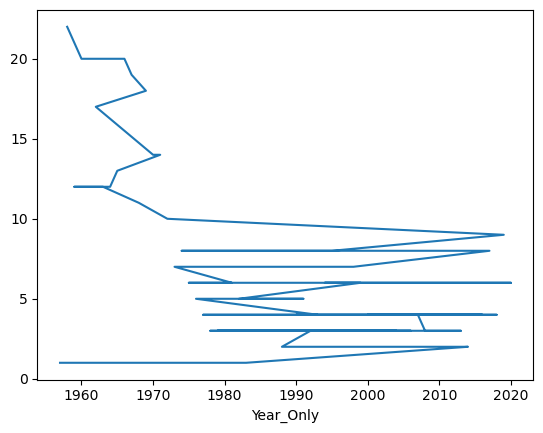

In [ ]:
import seaborn

df_mission_failure_counts = df_mission_failure['Year_Only'].value_counts()
# Plot the result
df_mission_failure_counts.plot()
plt.show()

In [247]:
df_data

,Organization,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,Year_Only,Month,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00,2020,"Fri Aug 07, 2020 05:12 UTC",USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00,2020,"Thu Aug 06, 2020 04:01 UTC",China
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04 23:57:00+00:00,2020,"Tue Aug 04, 2020 23:57 UTC",USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30 21:25:00+00:00,2020,"Thu Jul 30, 2020 21:25 UTC",Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30 11:50:00+00:00,2020,"Thu Jul 30, 2020 11:50 UTC",USA
...,...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,1958-02-05 07:33:00+00:00,1958,"Wed Feb 05, 1958 07:33 UTC",USA
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,1958-02-01 03:48:00+00:00,1958,"Sat Feb 01, 1958 03:48 UTC",USA
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,1957-12-06 16:44:00+00:00,1957,"Fri Dec 06, 1957 16:44 UTC",USA
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,1957-11-03 02:30:00+00:00,1957,"Sun Nov 03, 1957 02:30 UTC",Kazakhstan


In [251]:
# Launches by Country by Year make dataframe
missions = df_data[["Mission_Status", "Year_Only"]]
missions

,Mission_Status,Year_Only
0,Success,2020
1,Success,2020
2,Success,2020
3,Success,2020
4,Success,2020
...,...,...
4319,Failure,1958
4320,Success,1958
4321,Failure,1957
4322,Success,1957


In [252]:
missions['Mission_Status'].unique()

array(['Success', 'Failure', 'Prelaunch Failure', 'Partial Failure'],
      dtype=object)

In [254]:
# All failures are failures
missions['Mission_Status'].replace('Partial Failure', 'Failure', inplace=True)
missions


C:\Users\LauraKhadas\AppData\Local\Temp\ipykernel_35816\3559672071.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Mission_Status,Year_Only
0,Success,2020
1,Success,2020
2,Success,2020
3,Success,2020
4,Success,2020
...,...,...
4319,Failure,1958
4320,Success,1958
4321,Failure,1957
4322,Success,1957


In [255]:
missions['Mission_Status'].unique()

array(['Success', 'Failure', 'Prelaunch Failure'], dtype=object)

In [256]:
# All failures are failures
missions['Mission_Status'].replace('Prelaunch Failure', 'Failure', inplace=True)
missions

C:\Users\LauraKhadas\AppData\Local\Temp\ipykernel_35816\2440642038.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Mission_Status,Year_Only
0,Success,2020
1,Success,2020
2,Success,2020
3,Success,2020
4,Success,2020
...,...,...
4319,Failure,1958
4320,Success,1958
4321,Failure,1957
4322,Success,1957


In [257]:
missions['Mission_Status'].unique()

array(['Success', 'Failure'], dtype=object)

In [258]:
# Make a second dataframe with only the successes by deleting the successes

mission_failures = missions[~missions['Mission_Status'].isin(['Success'])]
mission_failures

,Mission_Status,Year_Only
11,Failure,2020
15,Failure,2020
27,Failure,2020
36,Failure,2020
43,Failure,2020
...,...,...
4314,Failure,1958
4315,Failure,1958
4318,Failure,1958
4319,Failure,1958


In [259]:
mission_failures['Mission_Status'].unique()

array(['Failure'], dtype=object)

In [263]:
mission_failures=mission_failures.rename(columns = {'Mission_Status':'Failures'})
mission_failures

,Failures,Year_Only
11,Failure,2020
15,Failure,2020
27,Failure,2020
36,Failure,2020
43,Failure,2020
...,...,...
4314,Failure,1958
4315,Failure,1958
4318,Failure,1958
4319,Failure,1958


In [276]:
failure_by_year = mission_failures.groupby(by=["Failures", "Year_Only"], as_index=False).count()
failure_by_year = failure_by_year.sort_values("Failures")[["Year_Only", "Failures"]]
failure_by_year.reset_index(inplace=True) 
failure_by_year

,index,Year_Only,Failures
0,0,1957,Failure
1,34,1991,Failure
2,35,1992,Failure
3,36,1993,Failure
4,37,1994,Failure
...,...,...,...
59,27,1984,Failure
60,28,1985,Failure
61,29,1986,Failure
62,62,2019,Failure


In [281]:
failure_by_year = failure_by_year.rename(columns = {'index':'Failure_Count'})
failure_by_year

,Failure_Count,Year_Only,Failures
0,0,1957,Failure
1,34,1991,Failure
2,35,1992,Failure
3,36,1993,Failure
4,37,1994,Failure
...,...,...,...
59,27,1984,Failure
60,28,1985,Failure
61,29,1986,Failure
62,62,2019,Failure


In [283]:
# Make a chart of # of failures (counts) per year

failures_bar = px.bar(failure_by_year,
                  x="Year_Only", 
                  y="Failure_Count",
                  hover_name="Failures", 
                  title="Launch Failures by Year")
 
failures_bar.update_layout(xaxis_title="Year",
                      yaxis_title="Failures",
                      coloraxis_showscale=True)
 
failures_bar.show()


## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [ ]:
df_failure_percentages = df_mission_failure['Year_Only'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
df_failure_percentages

Year_Only
1958    4.9%
1960    4.5%
1961    4.5%
1966    4.5%
1967    4.3%
        ... 
2002    0.4%
2011    0.4%
2014    0.4%
1983    0.2%
1957    0.2%
Name: proportion, Length: 64, dtype: object

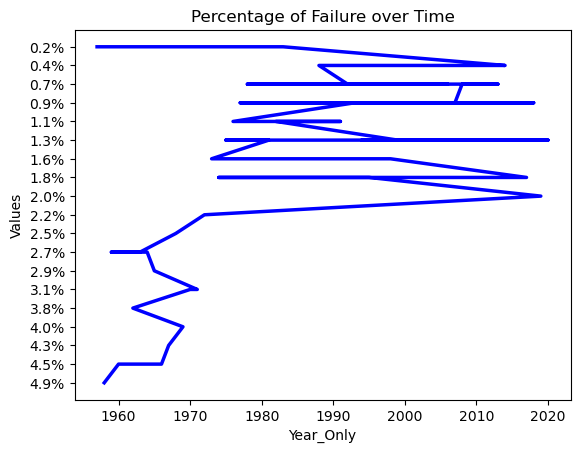

In [ ]:
# Chart the percentage of failures
df_failure_percentages
plt.plot(df_failure_percentages.index, df_failure_percentages.values, color='Blue', linewidth=2.5)
plt.xlabel('Year_Only')
plt.ylabel('Values')
plt.title('Percentage of Failure over Time')
plt.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [208]:
df_data.head()

,Organization,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,Year_Only,Month
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00,2020,"Fri Aug 07, 2020 05:12 UTC"
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00,2020,"Thu Aug 06, 2020 04:01 UTC"
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04 23:57:00+00:00,2020,"Tue Aug 04, 2020 23:57 UTC"
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30 21:25:00+00:00,2020,"Thu Jul 30, 2020 21:25 UTC"
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30 11:50:00+00:00,2020,"Thu Jul 30, 2020 11:50 UTC"


In [209]:
# Add country and country code data
#Add a Country colunn as a duplicate of the Location
df_data['Country'] = df_data.loc[:, "Location"]
df_data.head()

,Organization,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,Year_Only,Month,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00,2020,"Fri Aug 07, 2020 05:12 UTC","LC-39A, Kennedy Space Center, Florida, USA"
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00,2020,"Thu Aug 06, 2020 04:01 UTC","Site 9401 (SLS-2), Jiuquan Satellite Launch Ce..."
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04 23:57:00+00:00,2020,"Tue Aug 04, 2020 23:57 UTC","Pad A, Boca Chica, Texas, USA"
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30 21:25:00+00:00,2020,"Thu Jul 30, 2020 21:25 UTC","Site 200/39, Baikonur Cosmodrome, Kazakhstan"
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30 11:50:00+00:00,2020,"Thu Jul 30, 2020 11:50 UTC","SLC-41, Cape Canaveral AFS, Florida, USA"


In [210]:
# Next, delete everything before the last comma
df_data['Country'] = df_data['Country'].str.split(',').str[-1].str.strip()
df_data.head()

,Organization,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,Year_Only,Month,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00,2020,"Fri Aug 07, 2020 05:12 UTC",USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00,2020,"Thu Aug 06, 2020 04:01 UTC",China
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04 23:57:00+00:00,2020,"Tue Aug 04, 2020 23:57 UTC",USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30 21:25:00+00:00,2020,"Thu Jul 30, 2020 21:25 UTC",Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30 11:50:00+00:00,2020,"Thu Jul 30, 2020 11:50 UTC",USA


In [212]:
# Replace the outliers

df_data['Country'] = df_data['Country'].replace(['Yellow Sea'], 'China')
df_data['Country'] = df_data['Country'].replace(['New Mexico' ], 'USA')
df_data['Country'] = df_data['Country'].replace(['Pacific Ocean'], 'USA')
df_data['Country'] = df_data['Country'].replace(['Gran Canaria' ], 'USA')
df_data['Country'] = df_data['Country'].replace(['Pacific Missile Range Facility'], 'USA')
df_data['Country'] = df_data['Country'].replace(['Shahrud Missile Test Site'], 'Iran')
df_data['Country'] = df_data['Country'].replace(['Russia'], 'Russian Federation')
df_data['Country'] = df_data['Country'].replace(['Barents Sea'], 'Russian Federation')
df_data['Country'].unique()

array(['USA', 'China', 'Kazakhstan', 'Japan', 'Israel', 'New Zealand',
       'Russian Federation', 'Iran', 'France', 'India', 'North Korea',
       'South Korea', 'Brazil', 'Kenya', 'Australia'], dtype=object)

In [214]:
# Launches by Country by Year make dataframe
country_year = df_data[["Country", "Year_Only"]]
country_year

,Country,Year_Only
0,USA,2020
1,China,2020
2,USA,2020
3,Kazakhstan,2020
4,USA,2020
...,...,...
4319,USA,1958
4320,USA,1958
4321,USA,1957
4322,Kazakhstan,1957


In [220]:
country_by_year = country_year.groupby(by=["Country", "Year_Only"], as_index=False).count()
country_by_year = country_by_year.sort_values("Year_Only")[["Year_Only", "Country"]]
country_by_year.reset_index(inplace=True) 
country_by_year

,index,Year_Only,Country
0,348,1957,USA
1,207,1957,Kazakhstan
2,349,1958,USA
3,208,1958,Kazakhstan
4,350,1959,USA
...,...,...,...
407,206,2020,Japan
408,269,2020,Kazakhstan
409,280,2020,New Zealand
410,344,2020,Russian Federation


In [224]:
country_by_year=country_by_year.rename(columns = {'Count':'Launches'})
country_by_year

,Launches,Year_Only,Country
0,348,1957,USA
1,207,1957,Kazakhstan
2,349,1958,USA
3,208,1958,Kazakhstan
4,350,1959,USA
...,...,...,...
407,206,2020,Japan
408,269,2020,Kazakhstan
409,280,2020,New Zealand
410,344,2020,Russian Federation


In [226]:
# Make the chart of # of launches(counts) per year
country_chart = px.line(country_by_year,
                  x="Year_Only", 
                  y="Launches",
                  color="Country",
                  hover_name="Launches")
 
country_chart.update_layout(xaxis_title="Year",
                      yaxis_title="Launches")
 
country_chart.show()

In [227]:
# Make a second dataframe with only the successes by deleting the failures
# Launches by Country by Year make dataframe
successful_country_year = df_data[["Country", "Year_Only", "Mission_Status"]]
successful_country_year


,Country,Year_Only,Mission_Status
0,USA,2020,Success
1,China,2020,Success
2,USA,2020,Success
3,Kazakhstan,2020,Success
4,USA,2020,Success
...,...,...,...
4319,USA,1958,Failure
4320,USA,1958,Success
4321,USA,1957,Failure
4322,Kazakhstan,1957,Success


In [230]:
# Make a second dataframe with only the successes by deleting the failures
# SAMPLE CODE: CHANGE
successful_country_year = successful_country_year[~successful_country_year['Mission_Status'].isin(['Failure', 'Prelaunch Failure', 'Partial Failure'])]
successful_country_year


,Country,Year_Only,Mission_Status
0,USA,2020,Success
1,China,2020,Success
2,USA,2020,Success
3,Kazakhstan,2020,Success
4,USA,2020,Success
...,...,...,...
4316,USA,1958,Success
4317,USA,1958,Success
4320,USA,1958,Success
4322,Kazakhstan,1957,Success


In [229]:
successful_country_year['Mission_Status'].unique()

array(['Success', 'Prelaunch Failure', 'Partial Failure'], dtype=object)

In [231]:
successful_country_year = successful_country_year[~successful_country_year['Mission_Status'].isin(['Prelaunch Failure'])]
successful_country_year['Mission_Status'].unique()

array(['Success'], dtype=object)

In [232]:
successful_country_by_year = successful_country_year.groupby(by=["Country", "Year_Only"], as_index=False).count()
successful_country_by_year = successful_country_by_year.sort_values("Year_Only")[["Year_Only", "Country"]]
successful_country_by_year.reset_index(inplace=True) 
successful_country_by_year

,index,Year_Only,Country
0,175,1957,Kazakhstan
1,176,1958,Kazakhstan
2,310,1958,USA
3,177,1959,Kazakhstan
4,311,1959,USA
...,...,...,...
368,174,2020,Japan
369,119,2020,Iran
370,128,2020,Israel
371,308,2020,Russian Federation


In [233]:
successful_country_by_year=successful_country_by_year.rename(columns = {'index':'Launches'})
successful_country_by_year

,Launches,Year_Only,Country
0,175,1957,Kazakhstan
1,176,1958,Kazakhstan
2,310,1958,USA
3,177,1959,Kazakhstan
4,311,1959,USA
...,...,...,...
368,174,2020,Japan
369,119,2020,Iran
370,128,2020,Israel
371,308,2020,Russian Federation


In [234]:
# Make a chart of # of launches(counts) per year
country_chart = px.line(successful_country_by_year,
                  x="Year_Only", 
                  y="Launches",
                  color="Country",
                  hover_name="Launches")
 
country_chart.update_layout(xaxis_title="Year",
                      yaxis_title="Launches")
 
country_chart.show()

# Create a Year-on-Year Chart Showing the Organization Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organization was dominant in 2018, 2019 and 2020? 

In [96]:
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [97]:
# Change the date to a year and add a column
df_data['Year'] = df_data['Date']
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,"Fri Aug 07, 2020 05:12 UTC"
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,"Thu Aug 06, 2020 04:01 UTC"
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,"Tue Aug 04, 2020 23:57 UTC"
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,"Thu Jul 30, 2020 21:25 UTC"
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,"Thu Jul 30, 2020 11:50 UTC"


In [98]:
df_data['Year'] = pd.to_datetime(df_data['Year'], utc=True)
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04 23:57:00+00:00
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30 21:25:00+00:00
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30 11:50:00+00:00


In [ ]:
# Change the date to a year and add a column
df_data['Year'] = df_data['Date']
df_data.head()

In [99]:
df_data['Year_Only'] = df_data['Year'].dt.year
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,Year_Only
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00,2020
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00,2020
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04 23:57:00+00:00,2020
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30 21:25:00+00:00,2020
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30 11:50:00+00:00,2020


In [100]:
df_data['Month'] = df_data['Date']
df_data

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,Year_Only,Month
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00,2020,"Fri Aug 07, 2020 05:12 UTC"
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00,2020,"Thu Aug 06, 2020 04:01 UTC"
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04 23:57:00+00:00,2020,"Tue Aug 04, 2020 23:57 UTC"
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30 21:25:00+00:00,2020,"Thu Jul 30, 2020 21:25 UTC"
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30 11:50:00+00:00,2020,"Thu Jul 30, 2020 11:50 UTC"
...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,1958-02-05 07:33:00+00:00,1958,"Wed Feb 05, 1958 07:33 UTC"
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,1958-02-01 03:48:00+00:00,1958,"Sat Feb 01, 1958 03:48 UTC"
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,1957-12-06 16:44:00+00:00,1957,"Fri Dec 06, 1957 16:44 UTC"
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,1957-11-03 02:30:00+00:00,1957,"Sun Nov 03, 1957 02:30 UTC"


In [106]:
df_data.rename(columns={'Organisation': 'Organization'}, inplace=True)
df_data.head()

,Organization,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,Year_Only,Month
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07 05:12:00+00:00,2020,"Fri Aug 07, 2020 05:12 UTC"
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06 04:01:00+00:00,2020,"Thu Aug 06, 2020 04:01 UTC"
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04 23:57:00+00:00,2020,"Tue Aug 04, 2020 23:57 UTC"
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30 21:25:00+00:00,2020,"Thu Jul 30, 2020 21:25 UTC"
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30 11:50:00+00:00,2020,"Thu Jul 30, 2020 11:50 UTC"


In [237]:
orgs_by_year = df_data[['Organization', 'Year_Only']]
orgs_by_year

,Organization,Year_Only
0,SpaceX,2020
1,CASC,2020
2,SpaceX,2020
3,Roscosmos,2020
4,ULA,2020
...,...,...
4319,US Navy,1958
4320,AMBA,1958
4321,US Navy,1957
4322,RVSN USSR,1957


In [238]:
orgs_by_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Organization  4324 non-null   object
 1   Year_Only     4324 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 67.7+ KB


In [240]:
# Create a Year-on-Year Chart Showing the Organization Doing the Most Number of Launches
orgs_year = orgs_by_year.groupby(by=["Organization", "Year_Only"], as_index=False).count()
orgs_year = orgs_year.sort_values("Year_Only")[["Year_Only", "Organization"]]
orgs_year.reset_index(inplace=True) 
orgs_year

,index,Year_Only,Organization
0,623,1957,US Navy
1,497,1957,RVSN USSR
2,598,1958,US Air Force
3,624,1958,US Navy
4,3,1958,AMBA
...,...,...,...
658,539,2020,Rocket Lab
659,235,2020,ISA
660,161,2020,ExPace
661,48,2020,Arianespace


In [241]:
# Rename the index
orgs_year = orgs_year.rename(columns = {'index':'Launches'})
orgs_year


,Launches,Year_Only,Organization
0,623,1957,US Navy
1,497,1957,RVSN USSR
2,598,1958,US Air Force
3,624,1958,US Navy
4,3,1958,AMBA
...,...,...,...
658,539,2020,Rocket Lab
659,235,2020,ISA
660,161,2020,ExPace
661,48,2020,Arianespace


In [243]:
# Make a chart of # of launches(counts) per year
orgs_chart = px.line(orgs_year,
                  x="Year_Only", 
                  y="Launches",
                  color="Organization",
                  hover_name="Launches")
 
orgs_chart.update_layout(xaxis_title="Year",
                      yaxis_title="Launches")
 
orgs_chart.show()